<a href="https://colab.research.google.com/github/kapil2020/route-choice-machine-and-deep-learning/blob/main/Route_Choice_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation for Traditional Models

In [ ]:
import pandas as pd
df = pd.read_excel("factor_analysis_results.xlsx")

In [ ]:
df['aqiAwareness'] == 'aware_no_understand'

0      False
1      False
2       True
3      False
4      False
       ...  
718    False
719    False
720    False
721    False
722     True
Name: aqiAwareness, Length: 723, dtype: bool

In [ ]:
df = df.drop(['otherSymptoms'], axis=1)

In [ ]:
fa_cols = [
    "take_greener_route",
    "check_air_pollution_apps",
    "info_about_air_pollution",
    "ride_ev_reduce_pollution",
    "reduce_private_vehicle_use",
    "switch_to_public_transport",
    "tech_tools_avoid_pollution",
    "air_pollution_impact_health",
    "air_quality_influences_trip",
    "take_route_reduce_pollution",
    "avoid_high_traffic_pollution",
    "pollution_exposure_current_mode",
    "real_time_info_influence_choice",
    "public_transport_lower_pollution",
    "switch_to_public_transport_greener",
    "public_transport_cleaner_environment",
    "prefer_public_transport_reduce_pollution"
]

In [ ]:
df = df.drop(fa_cols, axis=1)

In [ ]:
distance = {'less_2km': 1, '2_5km': 2, '5_10km':3, 'more_10km':4}
age = {'15-19': 1, '20-29': 2, '30-44': 3, '44-59': 4, '60_above': 5}
income = {
    'no_income': 1,
    'less_25k': 2,
    '25_50k': 3,
    '50_1lakh': 4,
    '1_1_5lakh': 5,
    'above_1_5lakh': 6
}
frequency = {
    'few_days': 1,
    'once_week': 2,
    'everyday': 3
}
apiFreq = {
    'never': 1,
    'monthly': 2,
    'weekly': 3,
    'daily': 4,
    'special_advisory': 5
}
edu = {
    'grade_10_or_below': 1,
    'intermediate': 2,
    'graduate': 3,
    'postgraduate_above': 4
}
healthIssues = {'no': 0, 'yes': 1, 'dont_know': 2}
healthEffectsAwareness = {'no': 0, 'yes': 1, 'dont_know': 2}
travelMode = {'car': 1, 'metro': 2, 'bus': 3, 'two_wheeler': 4, 'auto_rickshaw': 5}
purpose = {'work': 1, 'leisure': 2, 'education': 3, 'other': 4}
aqiActions = {'change_mode': 1, 'no_action': 2, 'avoid_travel': 3, 'change_route': 4, 'change_time': 5}
aqiExposure = {
    'good': 1,
    'satisfactory': 2,
    'moderate': 3,
    'poor': 4,
    'very_poor': 5,
    'severe': 6
}
aqiInfoSource = {'website_app': 1, 'newspaper': 2, 'television': 3, 'not_check': 4, 'public_monitors': 5}
gender = {'male': 0, 'female': 1}
occupation = {'employee': 1, 'homemaker': 2, 'student': 3, 'self_employed': 4, 'unemployed': 5, 'retired': 6, 'other': 7}
aqiAwareness = {'aware_understand': 1, 'aware_no_understand': 2, 'not_aware': 3}

In [ ]:
df['income'] = df['income'].map(income)
df['education'] = df['education'].map(edu)
df['healthEffectsAwareness'] = df['healthEffectsAwareness'].map(healthEffectsAwareness)

In [ ]:
import pandas as pd

# Columns that need one-hot encoding
nominal_cols = [
    "aqiAwareness",
    "travelMode",
    "distance",
    "aqiExposure",
    "age",
    "frequency",
    "aqiFrequency",
    "healthIssues",
    "purpose",
    "aqiActions",
    "aqiInfoSource",
    "gender",
    "occupation"
]

# One-hot encode → convert bool to int
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Convert all boolean columns to 0/1 integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()

id  healthEffectsAwareness      symptoms/0      symptoms/1 symptoms/2  \
0   1                       1  eye_irritation             NaN        NaN   
1   2                       1            none             NaN        NaN   
2   3                       1    skin_problem             NaN        NaN   
3   4                       1    skin_problem  eye_irritation   sneezing   
4   5                       0        sneezing             NaN        NaN   

  symptoms/3  route set choice-1 choice-2 choice-3  ...  \
0        NaN          2  Route B  Route A  Route B  ...   
1        NaN          7  Route A  Route B  Route B  ...   
2        NaN          1  Route B  Route B  Route A  ...   
3        NaN          5  Route B  Route B  Route B  ...   
4        NaN          7  Route B  Route B  Route B  ...   

  aqiInfoSource_public_monitors  aqiInfoSource_television  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   aqiInfoSource_website_app  gender_male  occupation_homemaker  \
0                          1            1                     0   
1                          1            0                     1   
2                          1            0                     0   
3                          1            0                     0   
4                          0            1                     0   

   occupation_other  occupation_retired  occupation_self_employed  \
0                 0                   0                         0   
1                 0                   0                         0   
2                 0                   0                         0   
3                 0                   0                         0   
4                 0                   0                         1   

   occupation_student  occupation_unemployed  
0                   0                      0  
1                   0                      0  
2                   1                      0  
3                   0                      0  
4                   0                      0  

[5 rows x 60 columns]

In [ ]:
symptom_cols = ["symptoms/0","symptoms/1","symptoms/2","symptoms/3"]
df[symptom_cols] = df[symptom_cols].replace(0, None)
df["all_symptoms"] = df[symptom_cols].values.tolist()
symptom_types = ["skin_problem","sneezing","none","runny_nose","eye_irritation"]

# One-hot encode
for s in symptom_types:
    df[f"symptom_{s}"] = df["all_symptoms"].apply(lambda x: 1 if s in x else 0)

df.drop(columns=symptom_cols + ["all_symptoms"], inplace=True)

In [ ]:
import json

json_sets = {}

for i in range(1, 9):
    with open(f"set{i}.json", "r") as f:
        json_sets[i] = json.load(f)

In [ ]:
long_rows = []

choice_cols = ["choice-1", "choice-2", "choice-3", "choice-4"]

for idx, row in df.iterrows():
    respondent_id = row["id"]
    set_id = row["route set"]
    choices = [row[c] for c in choice_cols]
    scenarios = json_sets[set_id]

    for scen_index, scen in enumerate(scenarios):
        selected_route = choices[scen_index]
        scenario_number = scen_index + 1
        routes = {
            "Route A": scen["routes"]["Route A"],
            "Route B": scen["routes"]["Route B"]
        }

        for route_name, attributes in routes.items():
            target = 1 if route_name == selected_route else 0
            entry = {
                "uid": respondent_id,
                "set_id": set_id,
                "card": scenario_number,
                "alt": route_name,
                "chosen": target,
            }

            for k, v in attributes.items():
                entry[k] = v

            for col in df.columns:
                if col not in choice_cols and col not in ["route set", "id"]:
                    entry[col] = row[col]

            long_rows.append(entry)

long_df = pd.DataFrame(long_rows)

In [ ]:
long_df['TravelTime'] = (long_df['TravelTime'].str.strip().str.replace(r'(\d+)\s*min', r'\1 min', regex=True))

In [ ]:
AQL = {
    'Good (0-50)': 1,
    'Satisfactory (51-100)': 2,
    'Moderate (101-200)': 3,
    'Poor (201-300)': 4,
    'Very Poor (301-400)': 5,
    'Severe (401+)': 6
}
TT = {'Low: 20 min': 20, 'Medium: 30 min': 30, 'High: 40 min': 40}
TC = {'Low: 15 INR': 15, 'Medium: 25 INR': 25, 'High: 35 INR': 35}
delay = {'0-10% additional time': 1, '11-25% additional time': 2, '26-50% additional time': 3}
GC = {'Low Green Cover (urban/industrial areas)': 1, 'Moderate': 2, 'High Green Cover (tree-lined parks)': 3}
PIA = {'Available': 1, 'Not Available': 0}
TP = {'Work/Business': 1, 'Education': 2, 'Leisure/Personal': 3}

In [ ]:
long_df['AirQualityLevel'] = long_df['AirQualityLevel'].map(AQL)
long_df['TravelTime'] = long_df['TravelTime'].map(TT)
long_df['TravelCost'] = long_df['TravelCost'].map(TC)
long_df['Delay'] = long_df['Delay'].map(delay)
long_df['GreenCover'] = long_df['GreenCover'].map(GC)
long_df['PreTripInfoAvailable'] = long_df['PreTripInfoAvailable'].map(PIA)
long_df['TripPurpose'] = long_df['TripPurpose'].map(TP)

In [ ]:
long_df.to_excel('MNL_data.xlsx')

In [ ]:
import pandas as pd
df = pd.read_excel("MNL_data.xlsx")

In [ ]:
df.columns

Index(['Unnamed: 0', 'uid', 'set_id', 'card', 'alt', 'chosen',
       'AirQualityLevel', 'TravelTime', 'TravelCost', 'Delay', 'GreenCover',
       'PreTripInfoAvailable', 'TripPurpose', 'healthEffectsAwareness',
       'income', 'education', 'Pro-Public Transport Attitude',
       'Tech-Enabled Eco-Travel', 'Air Pollution Awareness',
       'aqiAwareness_aware_understand', 'aqiAwareness_not_aware',
       'travelMode_bus', 'travelMode_car', 'travelMode_metro',
       'travelMode_two_wheeler', 'distance_5_10km', 'distance_less_2km',
       'distance_more_10km', 'aqiExposure_moderate', 'aqiExposure_poor',
       'aqiExposure_satisfactory', 'aqiExposure_severe',
       'aqiExposure_very_poor', 'age_20-29', 'age_30-44', 'age_44-59',
       'age_60_above', 'frequency_few_days', 'frequency_once_week',
       'aqiFrequency_monthly', 'aqiFrequency_never',
       'aqiFrequency_special_advisory', 'aqiFrequency_weekly',
       'healthIssues_no', 'healthIssues_yes', 'purpose_leisure',
       'purp

In [ ]:
df.shape

(5784, 68)

## Data Preparation

In [ ]:
import pandas as pd
df = pd.read_excel("factor_analysis_results.xlsx")

In [ ]:
df.columns

Index(['id', 'travelMode', 'purpose', 'distance', 'frequency', 'aqiActions',
       'aqiExposure', 'aqiAwareness', 'aqiFrequency', 'healthIssues',
       'aqiInfoSource', 'healthEffectsAwareness', 'symptoms/0', 'symptoms/1',
       'symptoms/2', 'symptoms/3', 'otherSymptoms', 'take_greener_route',
       'check_air_pollution_apps', 'info_about_air_pollution',
       'ride_ev_reduce_pollution', 'reduce_private_vehicle_use',
       'switch_to_public_transport', 'tech_tools_avoid_pollution',
       'air_pollution_impact_health', 'air_quality_influences_trip',
       'take_route_reduce_pollution', 'avoid_high_traffic_pollution',
       'pollution_exposure_current_mode', 'real_time_info_influence_choice',
       'public_transport_lower_pollution',
       'switch_to_public_transport_greener',
       'public_transport_cleaner_environment',
       'prefer_public_transport_reduce_pollution', 'route set', 'choice-1',
       'choice-2', 'choice-3', 'choice-4', 'age', 'gender', 'income',
       'e

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        723 non-null    int64  
 1   travelMode                                723 non-null    object 
 2   purpose                                   723 non-null    object 
 3   distance                                  723 non-null    object 
 4   frequency                                 723 non-null    object 
 5   aqiActions                                723 non-null    object 
 6   aqiExposure                               723 non-null    object 
 7   aqiAwareness                              723 non-null    object 
 8   aqiFrequency                              723 non-null    object 
 9   healthIssues                              723 non-null    object 
 10  aqiInfoSource                         

In [ ]:
df.head()

id travelMode    purpose   distance frequency   aqiActions   aqiExposure  \
0   1        car       work  more_10km  everyday  change_mode     very_poor   
1   2      metro    leisure      2_5km  few_days    no_action  satisfactory   
2   3        bus  education  more_10km  everyday    no_action      moderate   
3   4      metro       work     5_10km  few_days  change_mode  satisfactory   
4   5      metro       work     5_10km  everyday  change_mode  satisfactory   

          aqiAwareness      aqiFrequency healthIssues  ... choice-3 choice-4  \
0     aware_understand  special_advisory          yes  ...  Route B  Route A   
1     aware_understand             daily           no  ...  Route B  Route B   
2  aware_no_understand           monthly           no  ...  Route A  Route A   
3     aware_understand           monthly           no  ...  Route B  Route B   
4            not_aware             never           no  ...  Route B  Route B   

     age  gender     income           education     occupation  \
0  30-44    male     25_50k            graduate       employee   
1  30-44  female  no_income            graduate      homemaker   
2  20-29  female  no_income  postgraduate_above        student   
3  20-29  female   less_25k            graduate       employee   
4  44-59    male  1_1_5lakh  postgraduate_above  self_employed   

   Pro-Public Transport Attitude  Tech-Enabled Eco-Travel  \
0                      -2.564141                 5.126369   
1                      -0.813931                -0.664280   
2                      -1.710352                -0.437148   
3                       0.719332                -1.348722   
4                       5.161518                -6.344254   

   Air Pollution Awareness  
0                 2.147989  
1                 1.711486  
2                -3.045224  
3                -1.018970  
4                -4.367468  

[5 rows x 47 columns]

In [ ]:
df.isnull().sum()

id                                            0
travelMode                                    0
purpose                                       0
distance                                      0
frequency                                     0
aqiActions                                    0
aqiExposure                                   0
aqiAwareness                                  0
aqiFrequency                                  0
healthIssues                                  0
aqiInfoSource                                 0
healthEffectsAwareness                        0
symptoms/0                                    0
symptoms/1                                  512
symptoms/2                                  649
symptoms/3                                  691
otherSymptoms                               722
take_greener_route                            1
check_air_pollution_apps                      4
info_about_air_pollution                      0
ride_ev_reduce_pollution                      3
reduce_private_vehicle_use                    1
switch_to_public_transport                    2
tech_tools_avoid_pollution                    0
air_pollution_impact_health                   5
air_quality_influences_trip                   0
take_route_reduce_pollution                   3
avoid_high_traffic_pollution                  3
pollution_exposure_current_mode               5
real_time_info_influence_choice               5
public_transport_lower_pollution              0
switch_to_public_transport_greener            0
public_transport_cleaner_environment          4
prefer_public_transport_reduce_pollution      0
route set                                     0
choice-1                                      0
choice-2                                      0
choice-3                                      0
choice-4                                      5
age                                           0
gender                                        0
income                                        0
education                                     0
occupation                                    0
Pro-Public Transport Attitude                 0
Tech-Enabled Eco-Travel                       0
Air Pollution Awareness                       0
dtype: int64

In [ ]:
df = df.drop(['otherSymptoms'], axis=1)

In [ ]:
fa_cols = [
    "take_greener_route",
    "check_air_pollution_apps",
    "info_about_air_pollution",
    "ride_ev_reduce_pollution",
    "reduce_private_vehicle_use",
    "switch_to_public_transport",
    "tech_tools_avoid_pollution",
    "air_pollution_impact_health",
    "air_quality_influences_trip",
    "take_route_reduce_pollution",
    "avoid_high_traffic_pollution",
    "pollution_exposure_current_mode",
    "real_time_info_influence_choice",
    "public_transport_lower_pollution",
    "switch_to_public_transport_greener",
    "public_transport_cleaner_environment",
    "prefer_public_transport_reduce_pollution"
]

In [ ]:
df = df.drop(fa_cols, axis=1)

In [ ]:
distance = {'less_2km': 1, '2_5km': 2, '5_10km':3, 'more_10km':4}
age = {'15-19': 1, '20-29': 2, '30-44': 3, '44-59': 4, '60_above': 5}
income = {
    'no_income': 1,
    'less_25k': 2,
    '25_50k': 3,
    '50_1lakh': 4,
    '1_1_5lakh': 5,
    'above_1_5lakh': 6
}
frequency = {
    'few_days': 1,
    'once_week': 2,
    'everyday': 3
}
apiFreq = {
    'never': 1,
    'monthly': 2,
    'weekly': 3,
    'daily': 4,
    'special_advisory': 5
}
edu = {
    'grade_10_or_below': 1,
    'intermediate': 2,
    'graduate': 3,
    'postgraduate_above': 4
}
healthIssues = {'no': 0, 'yes': 1, 'dont_know': 2}
healthEffectsAwareness = {'no': 0, 'yes': 1, 'dont_know': 2}
travelMode = {'car': 1, 'metro': 2, 'bus': 3, 'two_wheeler': 4, 'auto_rickshaw': 5}
purpose = {'work': 1, 'leisure': 2, 'education': 3, 'other': 4}
aqiActions = {'change_mode': 1, 'no_action': 2, 'avoid_travel': 3, 'change_route': 4, 'change_time': 5}
aqiExposure = {
    'good': 1,
    'satisfactory': 2,
    'moderate': 3,
    'poor': 4,
    'very_poor': 5,
    'severe': 6
}
aqiInfoSource = {'website_app': 1, 'newspaper': 2, 'television': 3, 'not_check': 4, 'public_monitors': 5}
gender = {'male': 0, 'female': 1}
occupation = {'employee': 1, 'homemaker': 2, 'student': 3, 'self_employed': 4, 'unemployed': 5, 'retired': 6, 'other': 7}
aqiAwareness = {'aware_understand': 1, 'aware_no_understand': 2, 'not_aware': 3}

In [ ]:
df['distance'] = df['distance'].map(distance)
df['age'] = df['age'].map(age)
df['income'] = df['income'].map(income)
df['frequency'] = df['frequency'].map(frequency)
df['aqiFrequency'] = df['aqiFrequency'].map(apiFreq)
df['education'] = df['education'].map(edu)
df['healthIssues'] = df['healthIssues'].map(healthIssues)
df['healthEffectsAwareness'] = df['healthEffectsAwareness'].map(healthEffectsAwareness)
# df['travelMode'] = df['travelMode'].map(travelMode)
# df['purpose'] = df['purpose'].map(purpose)
# df['aqiActions'] = df['aqiActions'].map(aqiActions)
df['aqiExposure'] = df['aqiExposure'].map(aqiExposure)
# df['aqiInfoSource'] = df['aqiInfoSource'].map(aqiInfoSource)
# df['gender'] = df['gender'].map(gender)
# df['occupation'] = df['occupation'].map(occupation)
df['aqiAwareness'] = df['aqiAwareness'].map(aqiAwareness)

In [ ]:
import pandas as pd

# Columns that need one-hot encoding
nominal_cols = [
    "travelMode",
    "purpose",
    "aqiActions",
    "aqiInfoSource",
    "gender",
    "occupation"
]

# One-hot encode → convert bool to int
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Convert all boolean columns to 0/1 integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()

id  distance  frequency  aqiExposure  aqiAwareness  aqiFrequency  \
0   1         4          3            5             1             5   
1   2         2          1            2             1             4   
2   3         4          3            3             2             2   
3   4         3          1            2             1             2   
4   5         3          3            2             3             1   

   healthIssues  healthEffectsAwareness      symptoms/0      symptoms/1  ...  \
0             1                       1  eye_irritation             NaN  ...   
1             0                       1            none             NaN  ...   
2             0                       1    skin_problem             NaN  ...   
3             0                       1    skin_problem  eye_irritation  ...   
4             0                       0        sneezing             NaN  ...   

  aqiInfoSource_public_monitors aqiInfoSource_television  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   aqiInfoSource_website_app gender_male occupation_homemaker  \
0                          1           1                    0   
1                          1           0                    1   
2                          1           0                    0   
3                          1           0                    0   
4                          0           1                    0   

  occupation_other occupation_retired  occupation_self_employed  \
0                0                  0                         0   
1                0                  0                         0   
2                0                  0                         0   
3                0                  0                         0   
4                0                  0                         1   

   occupation_student  occupation_unemployed  
0                   0                      0  
1                   0                      0  
2                   1                      0  
3                   0                      0  
4                   0                      0  

[5 rows x 45 columns]

In [ ]:
symptom_cols = ["symptoms/0","symptoms/1","symptoms/2","symptoms/3"]
df[symptom_cols] = df[symptom_cols].replace(0, None)
df["all_symptoms"] = df[symptom_cols].values.tolist()
symptom_types = ["skin_problem","sneezing","none","runny_nose","eye_irritation"]

# One-hot encode
for s in symptom_types:
    df[f"symptom_{s}"] = df["all_symptoms"].apply(lambda x: 1 if s in x else 0)

df.drop(columns=symptom_cols + ["all_symptoms"], inplace=True)

In [ ]:
df.head()

id  distance  frequency  aqiExposure  aqiAwareness  aqiFrequency  \
0   1         4          3            5             1             5   
1   2         2          1            2             1             4   
2   3         4          3            3             2             2   
3   4         3          1            2             1             2   
4   5         3          3            2             3             1   

   healthIssues  healthEffectsAwareness  route set choice-1  ...  \
0             1                       1          2  Route B  ...   
1             0                       1          7  Route A  ...   
2             0                       1          1  Route B  ...   
3             0                       1          5  Route B  ...   
4             0                       0          7  Route B  ...   

  occupation_other occupation_retired occupation_self_employed  \
0                0                  0                        0   
1                0                  0                        0   
2                0                  0                        0   
3                0                  0                        0   
4                0                  0                        1   

   occupation_student  occupation_unemployed  symptom_skin_problem  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   1                      0                     1   
3                   0                      0                     1   
4                   0                      0                     0   

   symptom_sneezing  symptom_none  symptom_runny_nose  symptom_eye_irritation  
0                 0             0                   0                       1  
1                 0             1                   0                       0  
2                 0             0                   0                       0  
3                 1             0                   0                       1  
4                 1             0                   0                       0  

[5 rows x 46 columns]

In [ ]:
import json

json_sets = {}

for i in range(1, 9):
    with open(f"set{i}.json", "r") as f:
        json_sets[i] = json.load(f)

In [ ]:
long_rows = []

choice_cols = ["choice-1", "choice-2", "choice-3", "choice-4"]

for idx, row in df.iterrows():
    respondent_id = row["id"]
    set_id = row["route set"]
    choices = [row[c] for c in choice_cols]
    scenarios = json_sets[set_id]

    for scen_index, scen in enumerate(scenarios):
        selected_route = choices[scen_index]
        scenario_number = scen_index + 1
        routes = {
            "Route A": scen["routes"]["Route A"],
            "Route B": scen["routes"]["Route B"]
        }

        for route_name, attributes in routes.items():
            target = 1 if route_name == selected_route else 0
            entry = {
                "uid": respondent_id,
                "set_id": set_id,
                "card": scenario_number,
                "alt": route_name,
                "chosen": target,
            }

            for k, v in attributes.items():
                entry[k] = v

            for col in df.columns:
                if col not in choice_cols and col not in ["route set", "id"]:
                    entry[col] = row[col]

            long_rows.append(entry)

long_df = pd.DataFrame(long_rows)

In [ ]:
long_df.head()

uid  set_id  card      alt  chosen        AirQualityLevel      TravelTime  \
0    1       2     1  Route A       0  Satisfactory (51-100)  Medium: 30 min   
1    1       2     1  Route B       1         Poor (201-300)     Low: 20 min   
2    1       2     2  Route A       1    Very Poor (301-400)  Medium: 30 min   
3    1       2     2  Route B       0     Moderate (101-200)     Low: 20 min   
4    1       2     3  Route A       0    Very Poor (301-400)     Low: 20 min   

       TravelCost                   Delay  \
0  Medium: 25 INR  11-25% additional time   
1     Low: 15 INR   0-10% additional time   
2  Medium: 25 INR  26-50% additional time   
3    High: 35 INR   0-10% additional time   
4    High: 35 INR  26-50% additional time   

                                 GreenCover  ... occupation_other  \
0  Low Green Cover (urban/industrial areas)  ...                0   
1                                  Moderate  ...                0   
2                                  Moderate  ...                0   
3       High Green Cover (tree-lined parks)  ...                0   
4                                  Moderate  ...                0   

  occupation_retired  occupation_self_employed  occupation_student  \
0                  0                         0                   0   
1                  0                         0                   0   
2                  0                         0                   0   
3                  0                         0                   0   
4                  0                         0                   0   

   occupation_unemployed  symptom_skin_problem  symptom_sneezing  \
0                      0                     0                 0   
1                      0                     0                 0   
2                      0                     0                 0   
3                      0                     0                 0   
4                      0                     0                 0   

   symptom_none  symptom_runny_nose  symptom_eye_irritation  
0             0                   0                       1  
1             0                   0                       1  
2             0                   0                       1  
3             0                   0                       1  
4             0                   0                       1  

[5 rows x 52 columns]

In [ ]:
long_df.to_excel("data.xlsx")

In [ ]:
long_df['TravelTime'] = (long_df['TravelTime'].str.strip().str.replace(r'(\d+)\s*min', r'\1 min', regex=True))

In [ ]:
long_df['TravelTime'].unique()

array(['Medium: 30 min', 'Low: 20 min', 'High: 40 min'], dtype=object)

In [ ]:
AQL = {
    'Good (0-50)': 1,
    'Satisfactory (51-100)': 2,
    'Moderate (101-200)': 3,
    'Poor (201-300)': 4,
    'Very Poor (301-400)': 5,
    'Severe (401+)': 6
}
# TT = {'Low: 20 min': 1, 'Medium: 30 min': 2, 'High: 40 min': 3}
# TC = {'Low: 15 INR': 1, 'Medium: 25 INR': 2, 'High: 35 INR': 3}
TT = {'Low: 20 min': 20, 'Medium: 30 min': 30, 'High: 40 min': 40}
TC = {'Low: 15 INR': 15, 'Medium: 25 INR': 25, 'High: 35 INR': 35}
delay = {'0-10% additional time': 1, '11-25% additional time': 2, '26-50% additional time': 3}
GC = {'Low Green Cover (urban/industrial areas)': 1, 'Moderate': 2, 'High Green Cover (tree-lined parks)': 3}
PIA = {'Available': 1, 'Not Available': 0}
TP = {'Work/Business': 1, 'Education': 2, 'Leisure/Personal': 3}

In [ ]:
long_df.columns

Index(['uid', 'set_id', 'card', 'alt', 'chosen', 'AirQualityLevel',
       'TravelTime', 'TravelCost', 'Delay', 'GreenCover',
       'PreTripInfoAvailable', 'TripPurpose', 'distance', 'frequency',
       'aqiExposure', 'aqiAwareness', 'aqiFrequency', 'healthIssues',
       'healthEffectsAwareness', 'age', 'income', 'education',
       'Pro-Public Transport Attitude', 'Tech-Enabled Eco-Travel',
       'Air Pollution Awareness', 'travelMode_bus', 'travelMode_car',
       'travelMode_metro', 'travelMode_two_wheeler', 'purpose_leisure',
       'purpose_other', 'purpose_work', 'aqiActions_change_mode',
       'aqiActions_change_route', 'aqiActions_change_time',
       'aqiActions_no_action', 'aqiInfoSource_not_check',
       'aqiInfoSource_public_monitors', 'aqiInfoSource_television',
       'aqiInfoSource_website_app', 'gender_male', 'occupation_homemaker',
       'occupation_other', 'occupation_retired', 'occupation_self_employed',
       'occupation_student', 'occupation_unemployed', 'sy

In [ ]:
long_df['AirQualityLevel'] = long_df['AirQualityLevel'].map(AQL)
long_df['TravelTime'] = long_df['TravelTime'].map(TT)
long_df['TravelCost'] = long_df['TravelCost'].map(TC)
long_df['Delay'] = long_df['Delay'].map(delay)
long_df['GreenCover'] = long_df['GreenCover'].map(GC)
long_df['PreTripInfoAvailable'] = long_df['PreTripInfoAvailable'].map(PIA)
long_df['TripPurpose'] = long_df['TripPurpose'].map(TP)

In [ ]:
long_df.to_excel('final_data2.xlsx')

In [ ]:
long_df.head()

uid  set_id  card      alt  chosen  AirQualityLevel  TravelTime  \
0    1       2     1  Route A       0                2          30   
1    1       2     1  Route B       1                4          20   
2    1       2     2  Route A       1                5          30   
3    1       2     2  Route B       0                3          20   
4    1       2     3  Route A       0                5          20   

   TravelCost  Delay  GreenCover  ...  occupation_other  occupation_retired  \
0          25      2           1  ...                 0                   0   
1          15      1           2  ...                 0                   0   
2          25      3           2  ...                 0                   0   
3          35      1           3  ...                 0                   0   
4          35      3           2  ...                 0                   0   

   occupation_self_employed  occupation_student  occupation_unemployed  \
0                         0                   0                      0   
1                         0                   0                      0   
2                         0                   0                      0   
3                         0                   0                      0   
4                         0                   0                      0   

   symptom_skin_problem  symptom_sneezing  symptom_none  symptom_runny_nose  \
0                     0                 0             0                   0   
1                     0                 0             0                   0   
2                     0                 0             0                   0   
3                     0                 0             0                   0   
4                     0                 0             0                   0   

   symptom_eye_irritation  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 52 columns]

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("final_data2.xlsx")

In [ ]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2
)

plt.rcParams.update({
    "figure.dpi": 300,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.1
})

In [ ]:
print("Chosen distribution:\n", df["chosen"].value_counts(normalize=True))

Chosen distribution:
 chosen
0    0.500864
1    0.499136
Name: proportion, dtype: float64


In [ ]:
chosen_df = df[df["chosen"] == 1].copy()
mode_cols = [
    "travelMode_bus",
    "travelMode_car",
    "travelMode_metro",
    "travelMode_two_wheeler"
]

chosen_df["travel_mode"] = chosen_df[mode_cols].idxmax(axis=1)
chosen_df["travel_mode"] = chosen_df["travel_mode"].replace({
    "travelMode_bus": "Bus",
    "travelMode_car": "Car",
    "travelMode_metro": "Metro",
    "travelMode_two_wheeler": "Two-wheeler"
})
short_df = (
    chosen_df
    .groupby("uid", as_index=False)
    .first()
)

In [ ]:
short_df.shape

(723, 54)

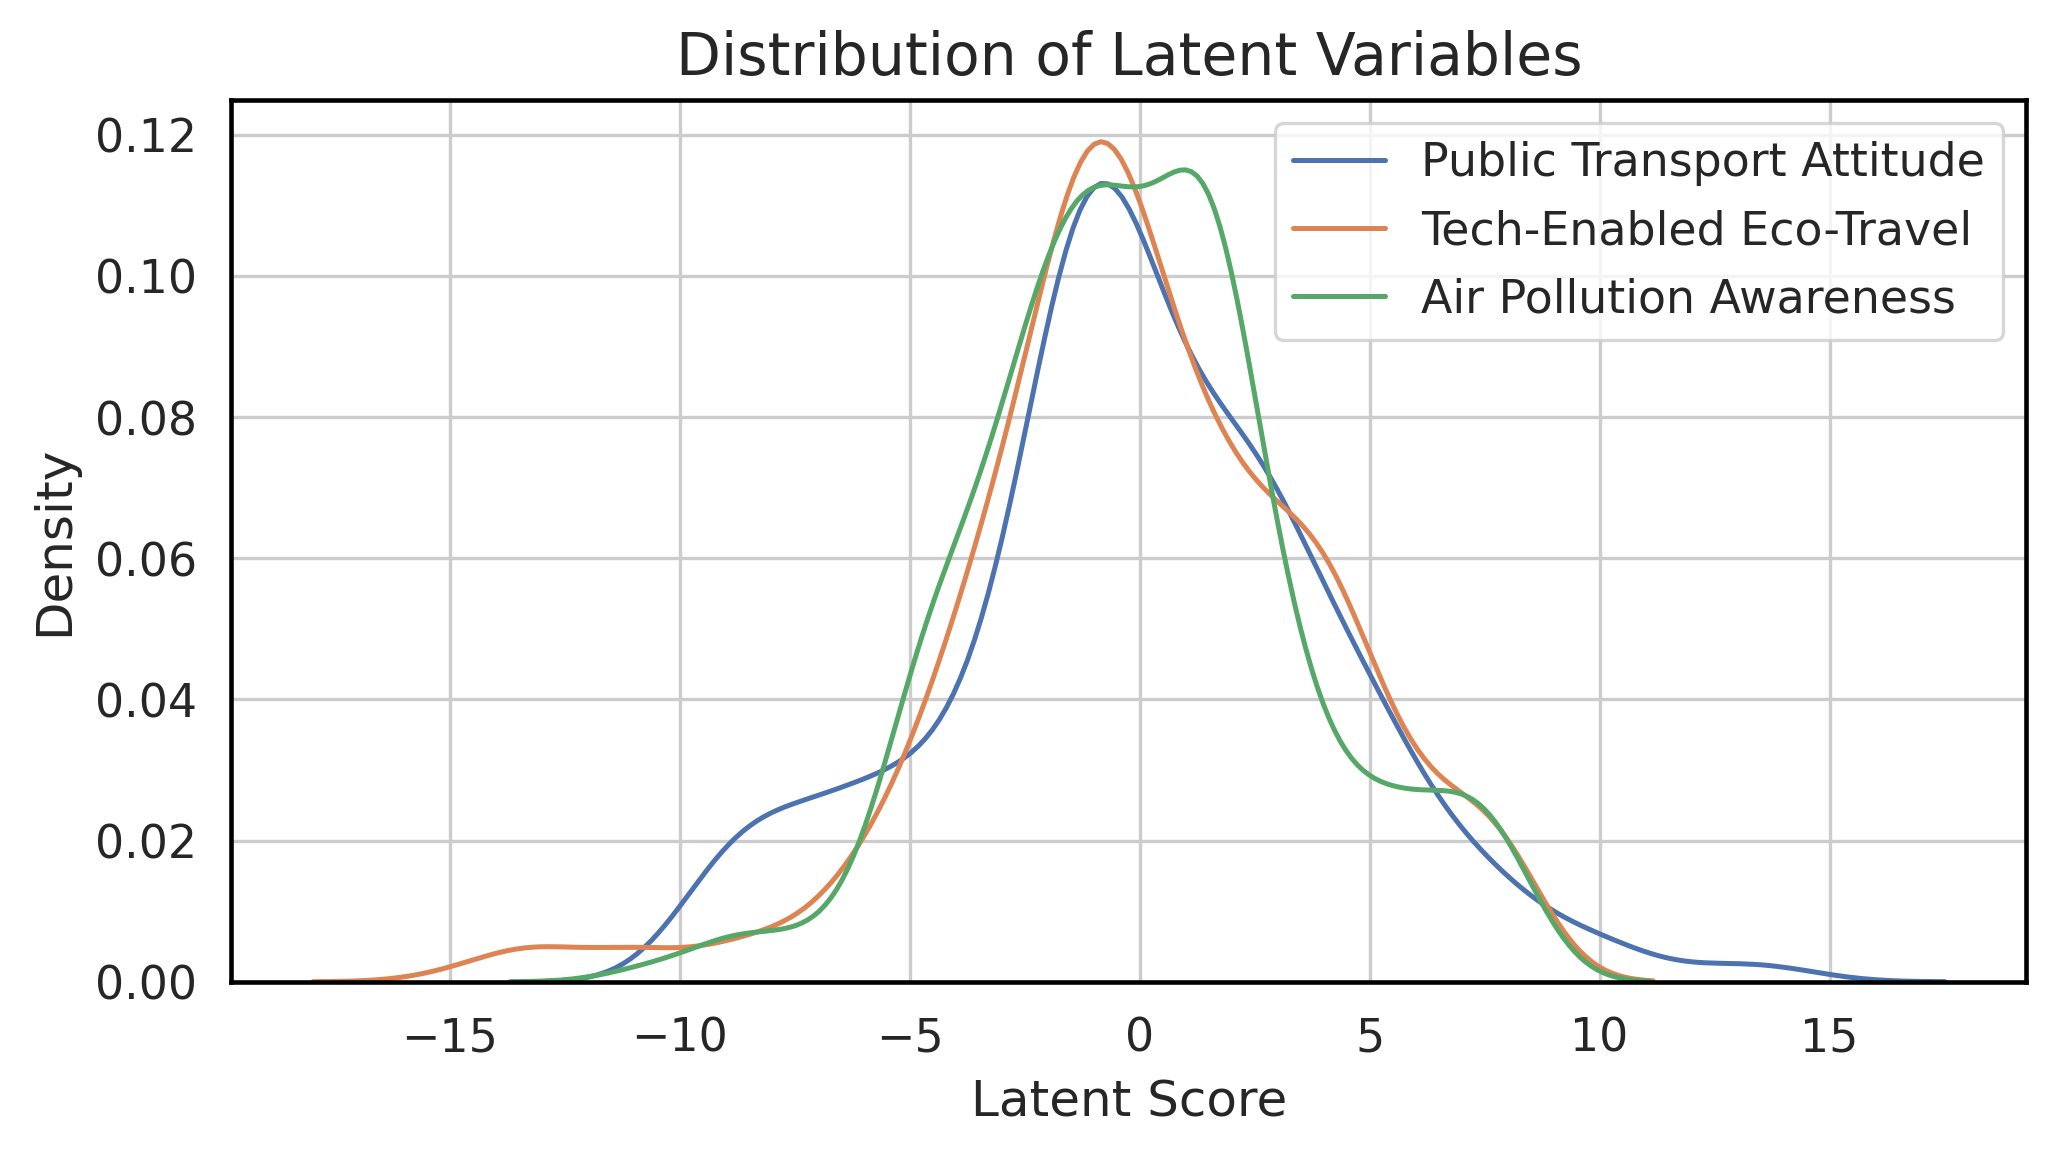

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(short_df["Pro-Public Transport Attitude"], label="Public Transport Attitude")
sns.kdeplot(short_df["Tech-Enabled Eco-Travel"], label="Tech-Enabled Eco-Travel")
sns.kdeplot(short_df["Air Pollution Awareness"], label="Air Pollution Awareness")
plt.xlabel("Latent Score")
plt.title("Distribution of Latent Variables")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def plot_percentage_countplot(ax, series, labels, title, xlabel, rotate=0):
    counts = series.value_counts().sort_index()
    perc = counts / counts.sum() * 100
    sns.barplot(
        x=perc.index,
        y=perc.values,
        palette=sns.color_palette("tab10"),
        ax=ax
    )
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=rotate)
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel(xlabel)
    ax.set_title(title, fontsize=11, weight="bold")
    for i, v in enumerate(perc.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=9)

/tmp/ipython-input-776887692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-776887692.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipython-input-776887692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-776887692.py:8: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(
/tmp/ipython-input-776887692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipytho

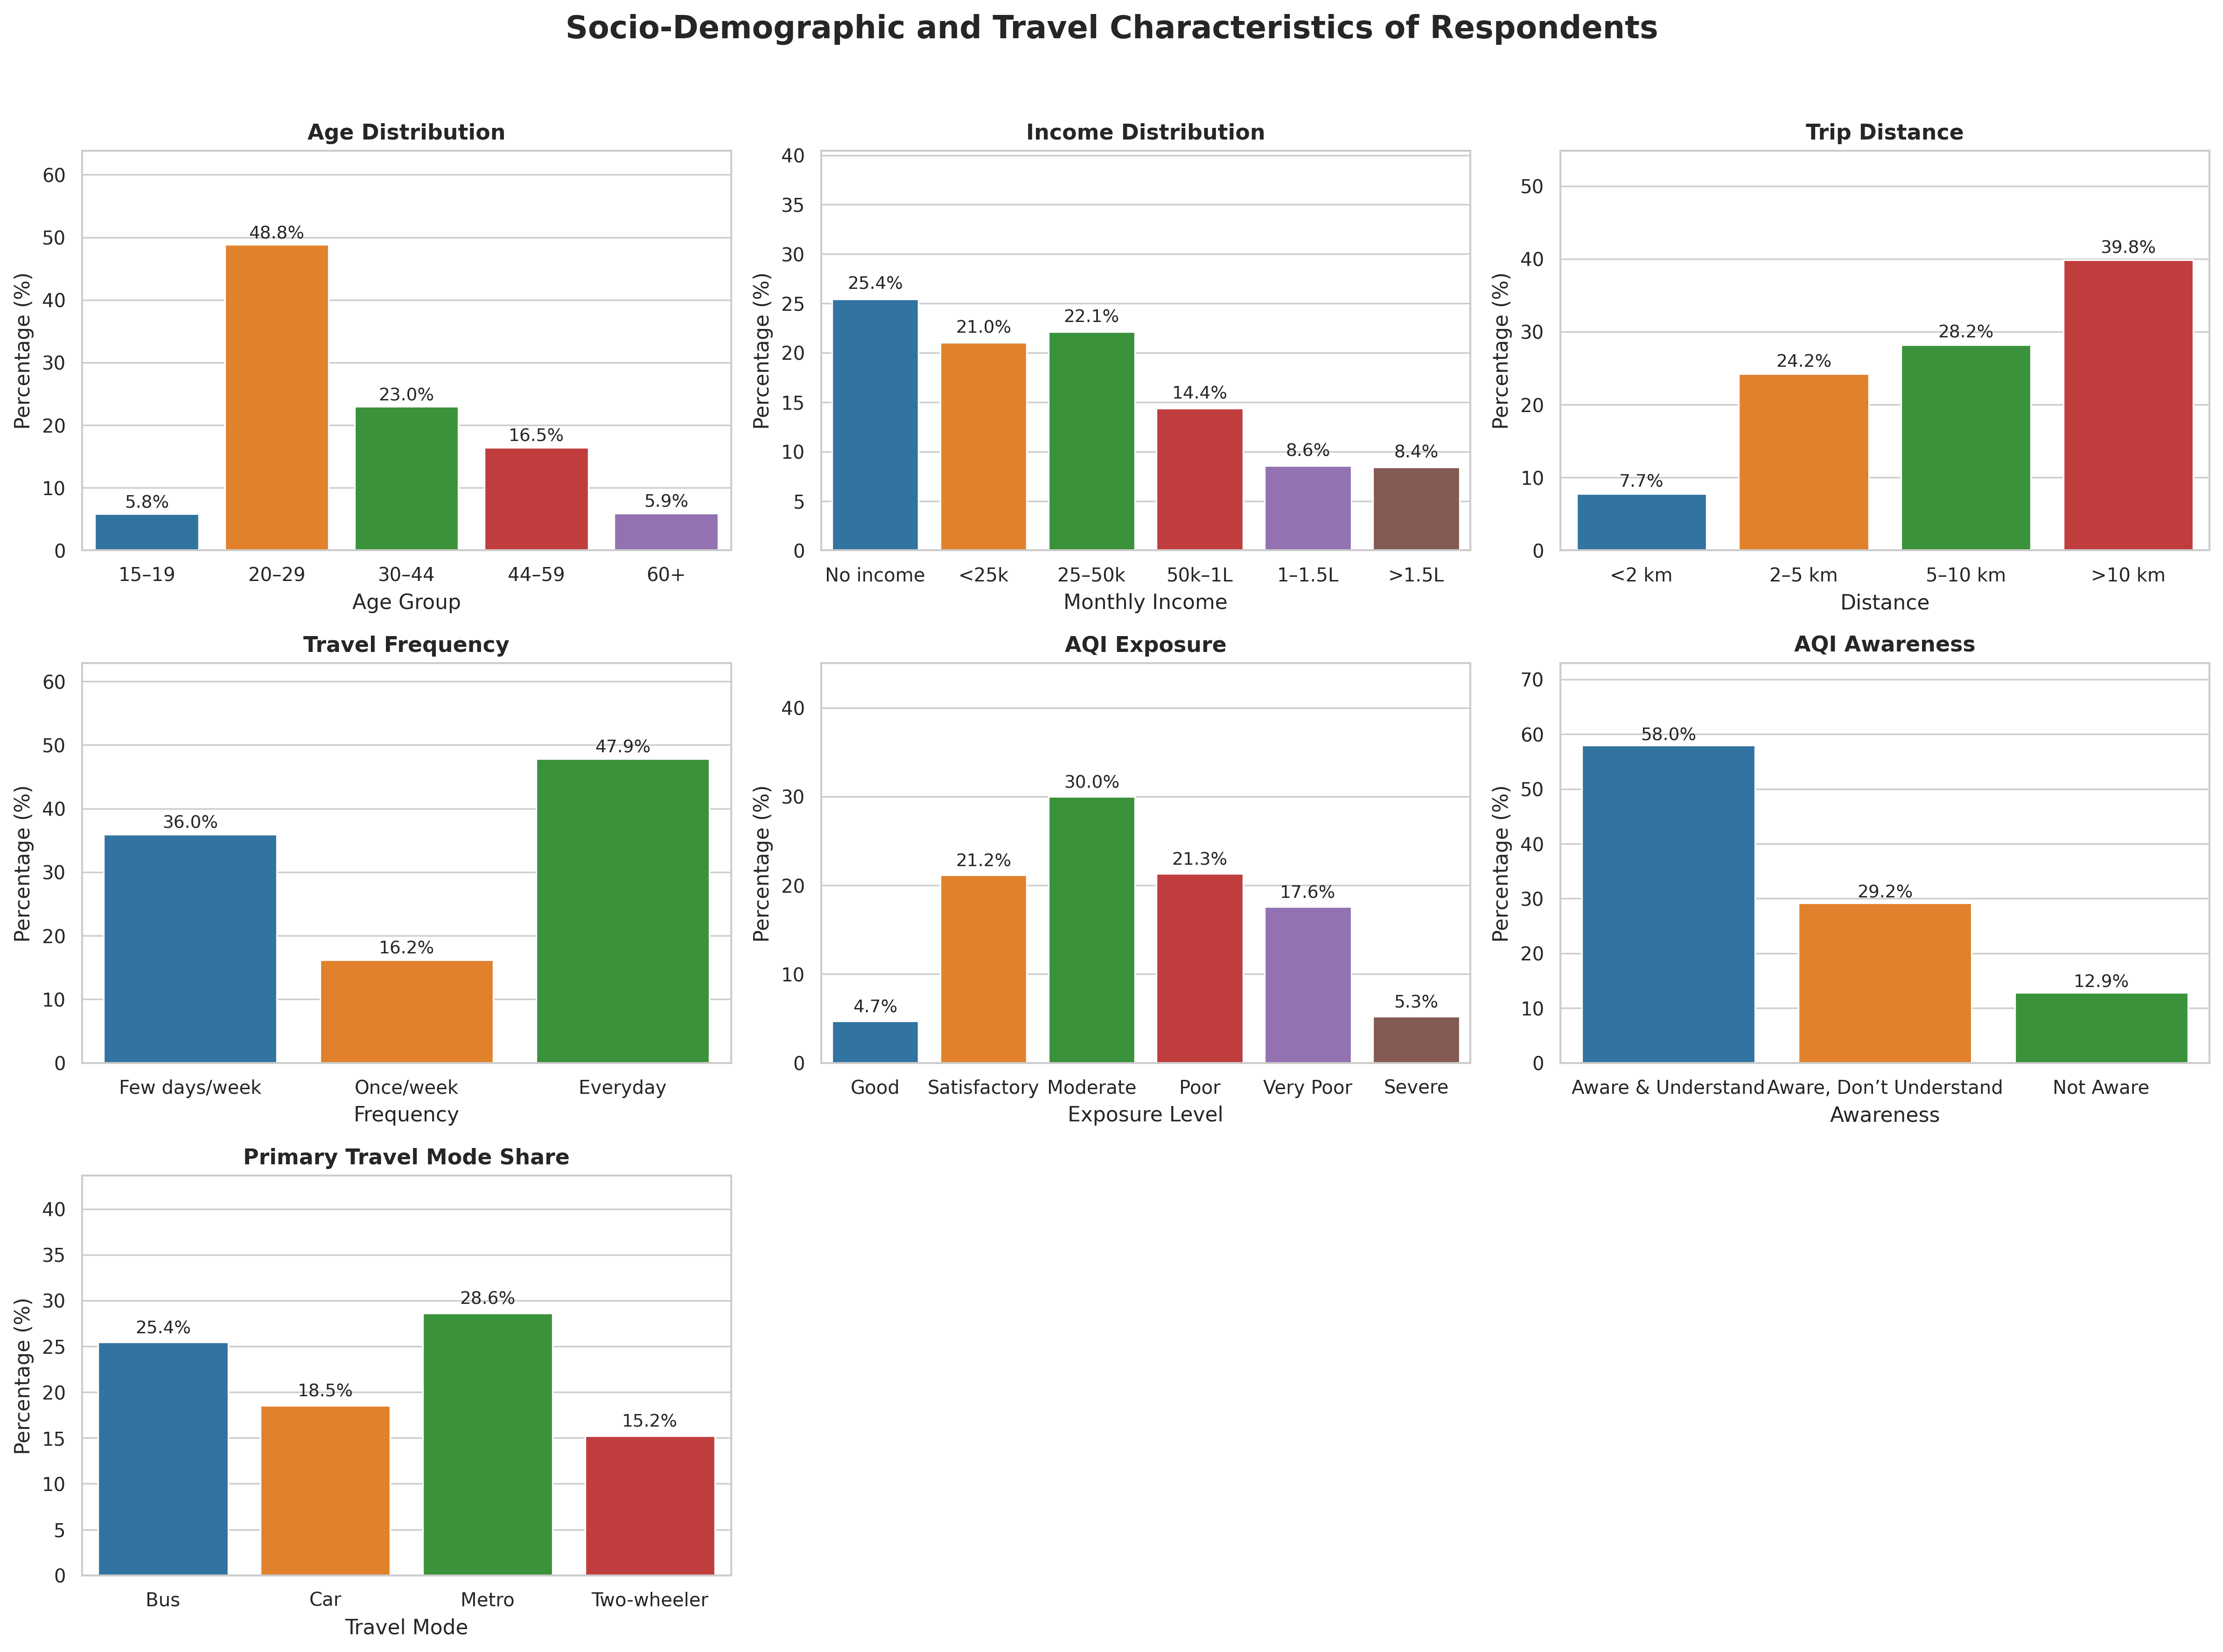

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.1)

def plot_percentage_bar(ax, series, labels, title, xlabel, rotate=0):
    counts = series.value_counts().sort_index()
    perc = counts / counts.sum() * 100

    sns.barplot(
        x=np.arange(len(perc)),
        y=perc.values,
        palette=sns.color_palette("tab10"),
        ax=ax
    )

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=rotate)
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel(xlabel)
    ax.set_title(title, fontsize=11, weight="bold")

    for i, v in enumerate(perc.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=9)

    ax.set_ylim(0, max(perc.values) + 15)

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
age_labels = ["15–19", "20–29", "30–44", "44–59", "60+"]
plot_percentage_bar(
    axes[0],
    short_df["age"],
    age_labels,
    "Age Distribution",
    "Age Group"
)
income_labels = ["No income", "<25k", "25–50k", "50k–1L", "1–1.5L", ">1.5L"]
plot_percentage_bar(
    axes[1],
    short_df["income"],
    income_labels,
    "Income Distribution",
    "Monthly Income"
)
distance_labels = ["<2 km", "2–5 km", "5–10 km", ">10 km"]
plot_percentage_bar(
    axes[2],
    short_df["distance"],
    distance_labels,
    "Trip Distance",
    "Distance"
)
freq_labels = ["Few days/week", "Once/week", "Everyday"]
plot_percentage_bar(
    axes[3],
    short_df["frequency"],
    freq_labels,
    "Travel Frequency",
    "Frequency"
)
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
plot_percentage_bar(
    axes[4],
    short_df["aqiExposure"],
    aqi_labels,
    "AQI Exposure",
    "Exposure Level"
)
awareness_labels = [
    "Aware & Understand",
    "Aware, Don’t Understand",
    "Not Aware"
]

plot_percentage_bar(
    axes[5],
    short_df["aqiAwareness"],
    awareness_labels,
    "AQI Awareness",
    "Awareness",
)
mode_cols = [
    "travelMode_bus",
    "travelMode_car",
    "travelMode_metro",
    "travelMode_two_wheeler"
]

mode_share = short_df[mode_cols].mean() * 100
mode_share.index = ["Bus", "Car", "Metro", "Two-wheeler"]

sns.barplot(
    x=mode_share.index,
    y=mode_share.values,
    palette=sns.color_palette("tab10"),
    ax=axes[6]
)

axes[6].set_ylabel("Percentage (%)")
axes[6].set_xlabel("Travel Mode")
axes[6].set_title("Primary Travel Mode Share", fontsize=11, weight="bold")

for i, v in enumerate(mode_share.values):
    axes[6].text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=9)

axes[6].set_ylim(0, max(mode_share.values) + 15)
fig.delaxes(axes[7])
fig.delaxes(axes[8])
plt.suptitle(
    "Socio-Demographic and Travel Characteristics of Respondents",
    fontsize=16,
    weight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

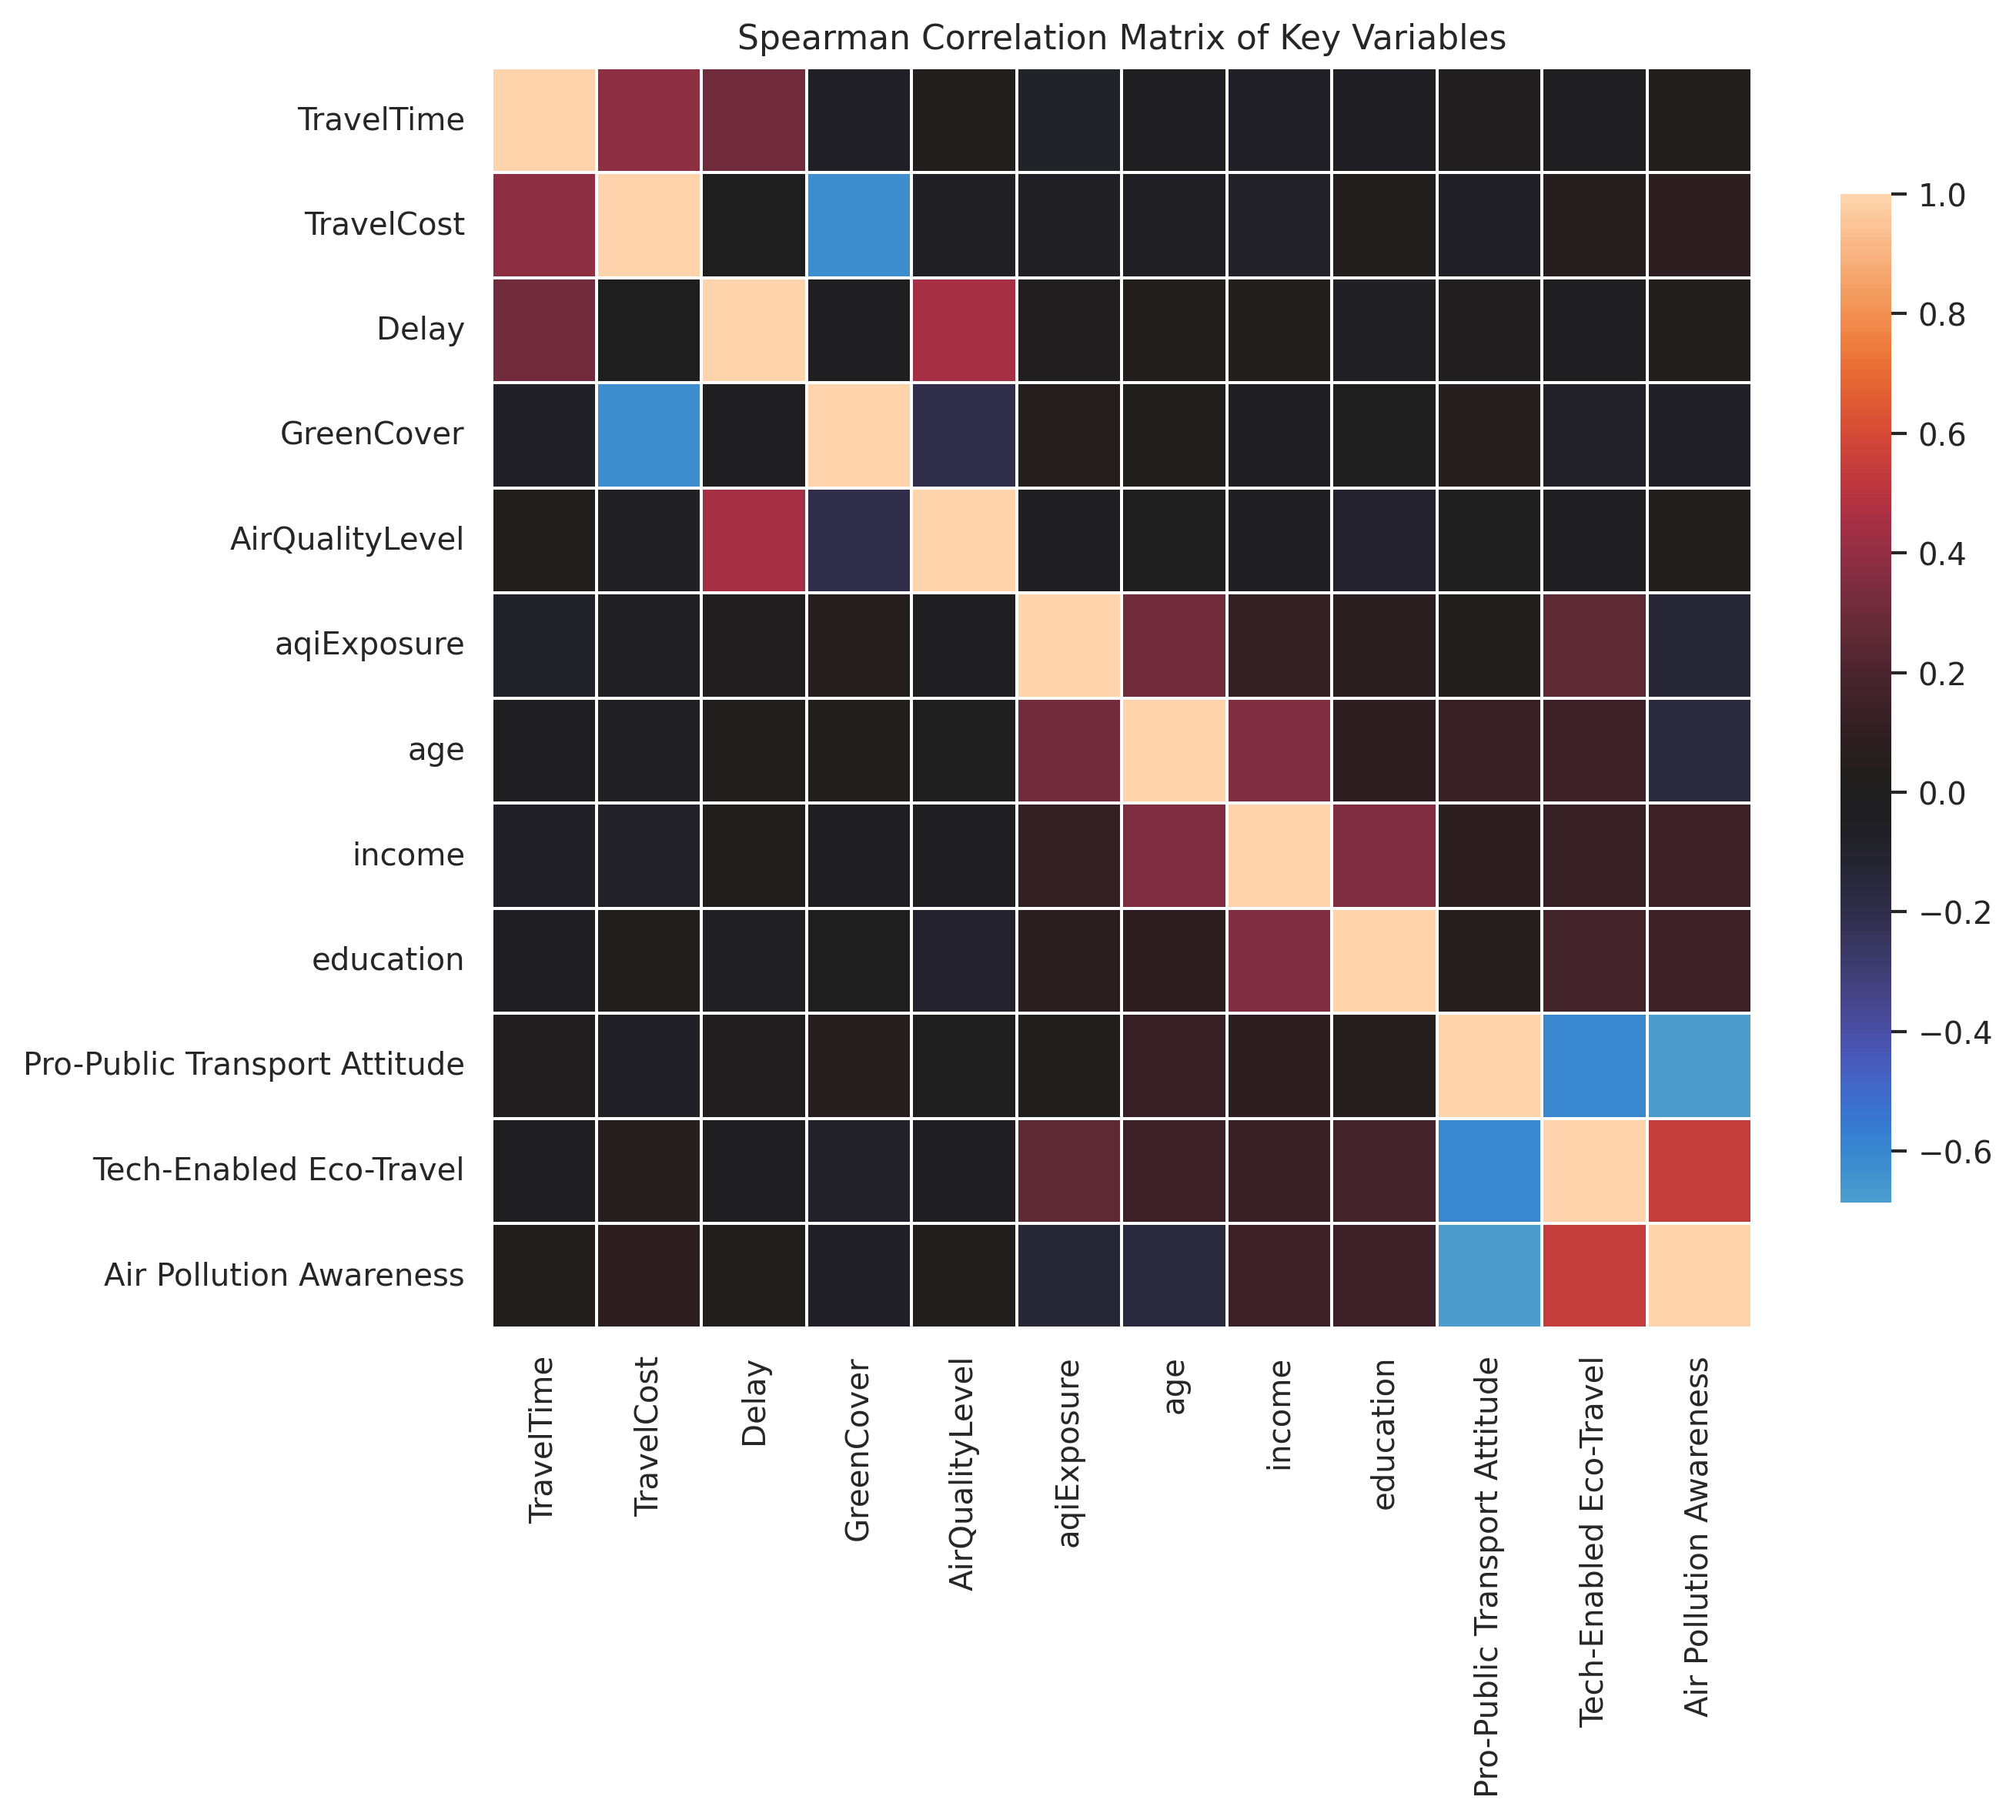

In [ ]:
corr_cols = [
    "TravelTime", "TravelCost", "Delay", "GreenCover",
    "AirQualityLevel", "aqiExposure",
    "age", "income", "education",
    "Pro-Public Transport Attitude",
    "Tech-Enabled Eco-Travel",
    "Air Pollution Awareness"
]

corr = short_df[corr_cols].corr(method="spearman")

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Spearman Correlation Matrix of Key Variables")
plt.tight_layout()
plt.show()

In [ ]:
PAPER_COLORS = [
    "#4E79A7",  # blue
    "#F28E2B",  # orange
    "#E15759",  # red
    "#76B7B2",  # teal
    "#59A14F",  # green
    "#EDC948",  # yellow
    "#B07AA1",  # purple
    "#FF9DA7",  # pink
]

In [ ]:
def stacked_percentage_bar(
    df,
    group_col,
    stack_cols,
    stack_labels,
    title,
    xlabel="Percentage",
    figsize=(8, 4)
):
    counts = (
        df.groupby([group_col, stack_cols])
          .size()
          .unstack(fill_value=0)
    )

    perc = counts.div(counts.sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(figsize=figsize)
    left = np.zeros(len(perc))

    for i, col in enumerate(perc.columns):
        ax.barh(
            perc.index,
            perc[col],
            left=left,
            color=PAPER_COLORS[i % len(PAPER_COLORS)],
            edgecolor="white",
            label=stack_labels[i]
        )
        left += perc[col]

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_xlim(0, 100)

    ax.legend(
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        frameon=False
    )

    ax.grid(False)
    plt.tight_layout()
    plt.show()

In [ ]:
mode_cols = [
    "travelMode_bus",
    "travelMode_car",
    "travelMode_metro",
    "travelMode_two_wheeler"
]

mode_labels = ["Bus", "Car", "Metro", "Two-wheeler"]

df_modes = df.copy()
df_modes["travel_mode"] = np.select(
    [df_modes[c] == 1 for c in mode_cols],
    mode_labels,
    default="Other"
)

In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
age_labels = ["15–19", "20–29", "30–44", "44–59", "60+"]
income_labels = ["No income", "< ₹25k", "₹25k–50k", "₹50k–1 lakh", "₹1–1.5 lakh", "> ₹1.5 lakh"]

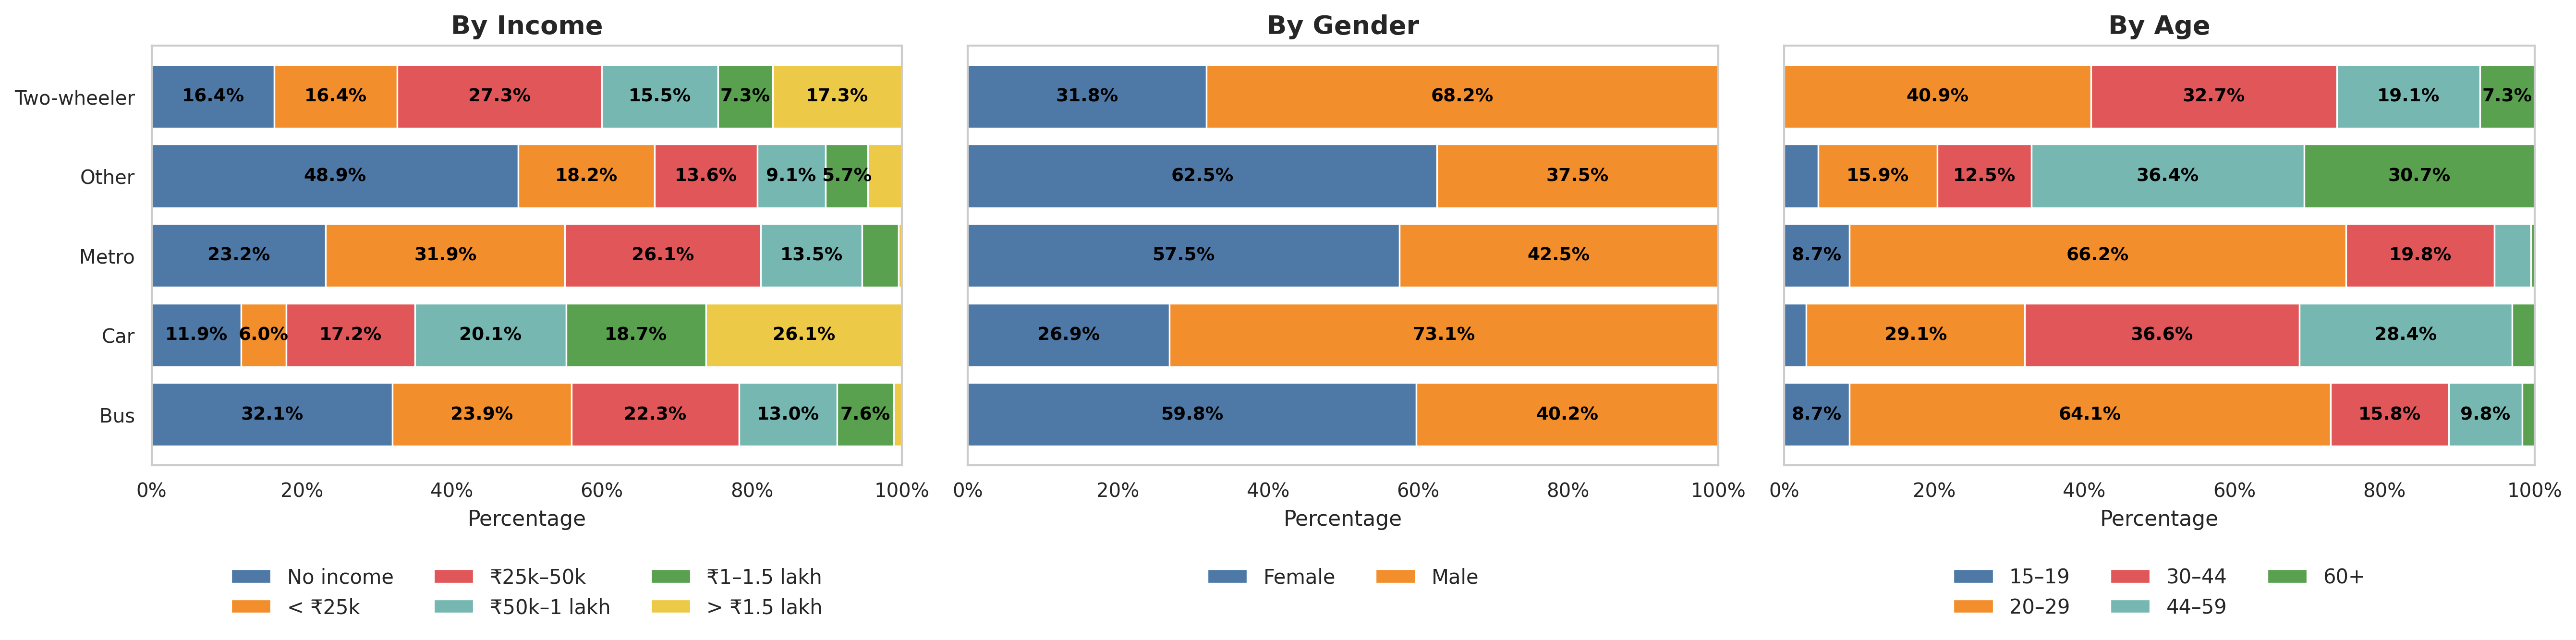

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plots = [
    ("income", income_labels, "By Income"),
    ("gender_male", ["Female", "Male"], "By Gender"),
    ("age", age_labels, "By Age"),
]

for ax, (col, labels, title) in zip(axes, plots):
    counts = (
        df_modes
        .groupby(["travel_mode", col])
        .size()
        .unstack(fill_value=0)
    )
    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    y_labels = perc.index.tolist()
    left = np.zeros(len(perc))
    for i, c in enumerate(perc.columns):
        values = perc[c].values

        ax.barh(
            y_labels,
            values,
            left=left,
            color=PAPER_COLORS[i],
            edgecolor="white",
            label=labels[i]
        )
        for j, val in enumerate(values):
            if val >= 5:
                ax.text(
                    left[j] + val / 2,
                    j,
                    f"{val:.1f}%",
                    va="center",
                    ha="center",
                    fontsize=9,
                    color="black",
                    weight="bold"
                )

        left += values

    ax.set_title(title, fontsize=13, weight="bold")
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.grid(False)

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.20),
        frameon=False,
        fontsize=10,
        ncol=min(3, len(labels))
    )

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [ ]:
category_groups = {
    "AQI Exposure": {
        "col": "aqiExposure",
        "labels": ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
    },
    "AQI Awareness": {
        "col": "aqiAwareness",
        "labels": ["Understands", "Knows but not understand", "Not aware"]
    },
    "AQI Frequency": {
        "col": "aqiFrequency",
        "labels": ["Never", "Monthly", "Weekly", "Daily", "Special Advisory"]
    },
    "AQI Actions": {
        "col": "aqiActions",
        "onehot": [
            "aqiActions_change_mode",
            "aqiActions_change_route",
            "aqiActions_change_time",
            "aqiActions_no_action"
        ],
        "labels": ["Change mode", "Change route", "Change time", "No action"]
    },
    "AQI Info Source": {
        "col": None,
        "onehot": [
            "aqiInfoSource_not_check",
            "aqiInfoSource_public_monitors",
            "aqiInfoSource_television",
            "aqiInfoSource_website_app"
        ],
        "labels": ["Not check", "Public monitors", "TV", "App/Website"]
    },
    "Symptoms": {
        "col": None,
        "onehot": [
            "symptom_skin_problem",
            "symptom_sneezing",
            "symptom_runny_nose",
            "symptom_eye_irritation",
            "symptom_none"
        ],
        "labels": ["Skin", "Sneezing", "Runny nose", "Eye irritation", "None"]
    },
    "Occupation": {
        "col": None,
        "onehot": [
            "occupation_homemaker",
            "occupation_other",
            "occupation_retired",
            "occupation_self_employed",
            "occupation_student",
            "occupation_unemployed"
        ],
        "labels": [
            "Homemaker", "Other", "Retired",
            "Self-employed", "Student", "Unemployed"
        ]
    },
}

In [ ]:
def plot_mode_distribution(df, var_name, config):
    plt.figure(figsize=(8,5))

    if "onehot" in config:
        onehot_cols = config["onehot"]
        df["tmp_var"] = df[onehot_cols].idxmax(axis=1)
        df["tmp_var"] = df["tmp_var"].replace(dict(zip(onehot_cols, config["labels"])))
    else:
        df["tmp_var"] = df[config["col"]].replace(
            {i+1: config["labels"][i] for i in range(len(config["labels"]))}
        )
    counts = df.groupby(["travel_mode", "tmp_var"]).size().unstack(fill_value=0)
    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    left = np.zeros(len(perc))

    for i, col in enumerate(perc.columns):
        plt.barh(
            perc.index,
            perc[col],
            left=left,
            color=PAPER_COLORS[i % len(PAPER_COLORS)],
            label=col,
            edgecolor="white"
        )
        left += perc[col]

    plt.title(var_name, fontsize=14, weight="bold")
    plt.xlabel("Percentage")
    plt.xaxis.set_major_formatter(PercentFormatter())
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
    plt.tight_layout()
    plt.show()

    df.drop(columns=["tmp_var"], inplace=True)

In [ ]:
plot_configs = [
    {
        "cols": [
            "symptom_skin_problem", "symptom_sneezing",
            "symptom_runny_nose", "symptom_eye_irritation", "symptom_none"
        ],
        "labels": ["Skin", "Sneezing", "Runny Nose", "Eye Irritation", "None"],
        "title": "Health Symptoms"
    },
    {
        "cols": [
            "occupation_homemaker", "occupation_other", "occupation_retired",
            "occupation_self_employed", "occupation_student",
            "occupation_unemployed"
        ],
        "labels": [
            "Homemaker", "Other", "Retired",
            "Self-employed", "Student", "Unemployed"
        ],
        "title": "Occupation"
    },
    {
        "cols": ["purpose_work", "purpose_leisure", "purpose_other"],
        "labels": ["Work", "Leisure", "Other"],
        "title": "Trip Purpose"
    }
]

/tmp/ipython-input-3613034989.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left[j] + val / 2,
/tmp/ipython-input-3613034989.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left[j] + val / 2,
/tmp/ipython-input-3613034989.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left[j] + val / 2,
/tmp/ipython-input-3613034989.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

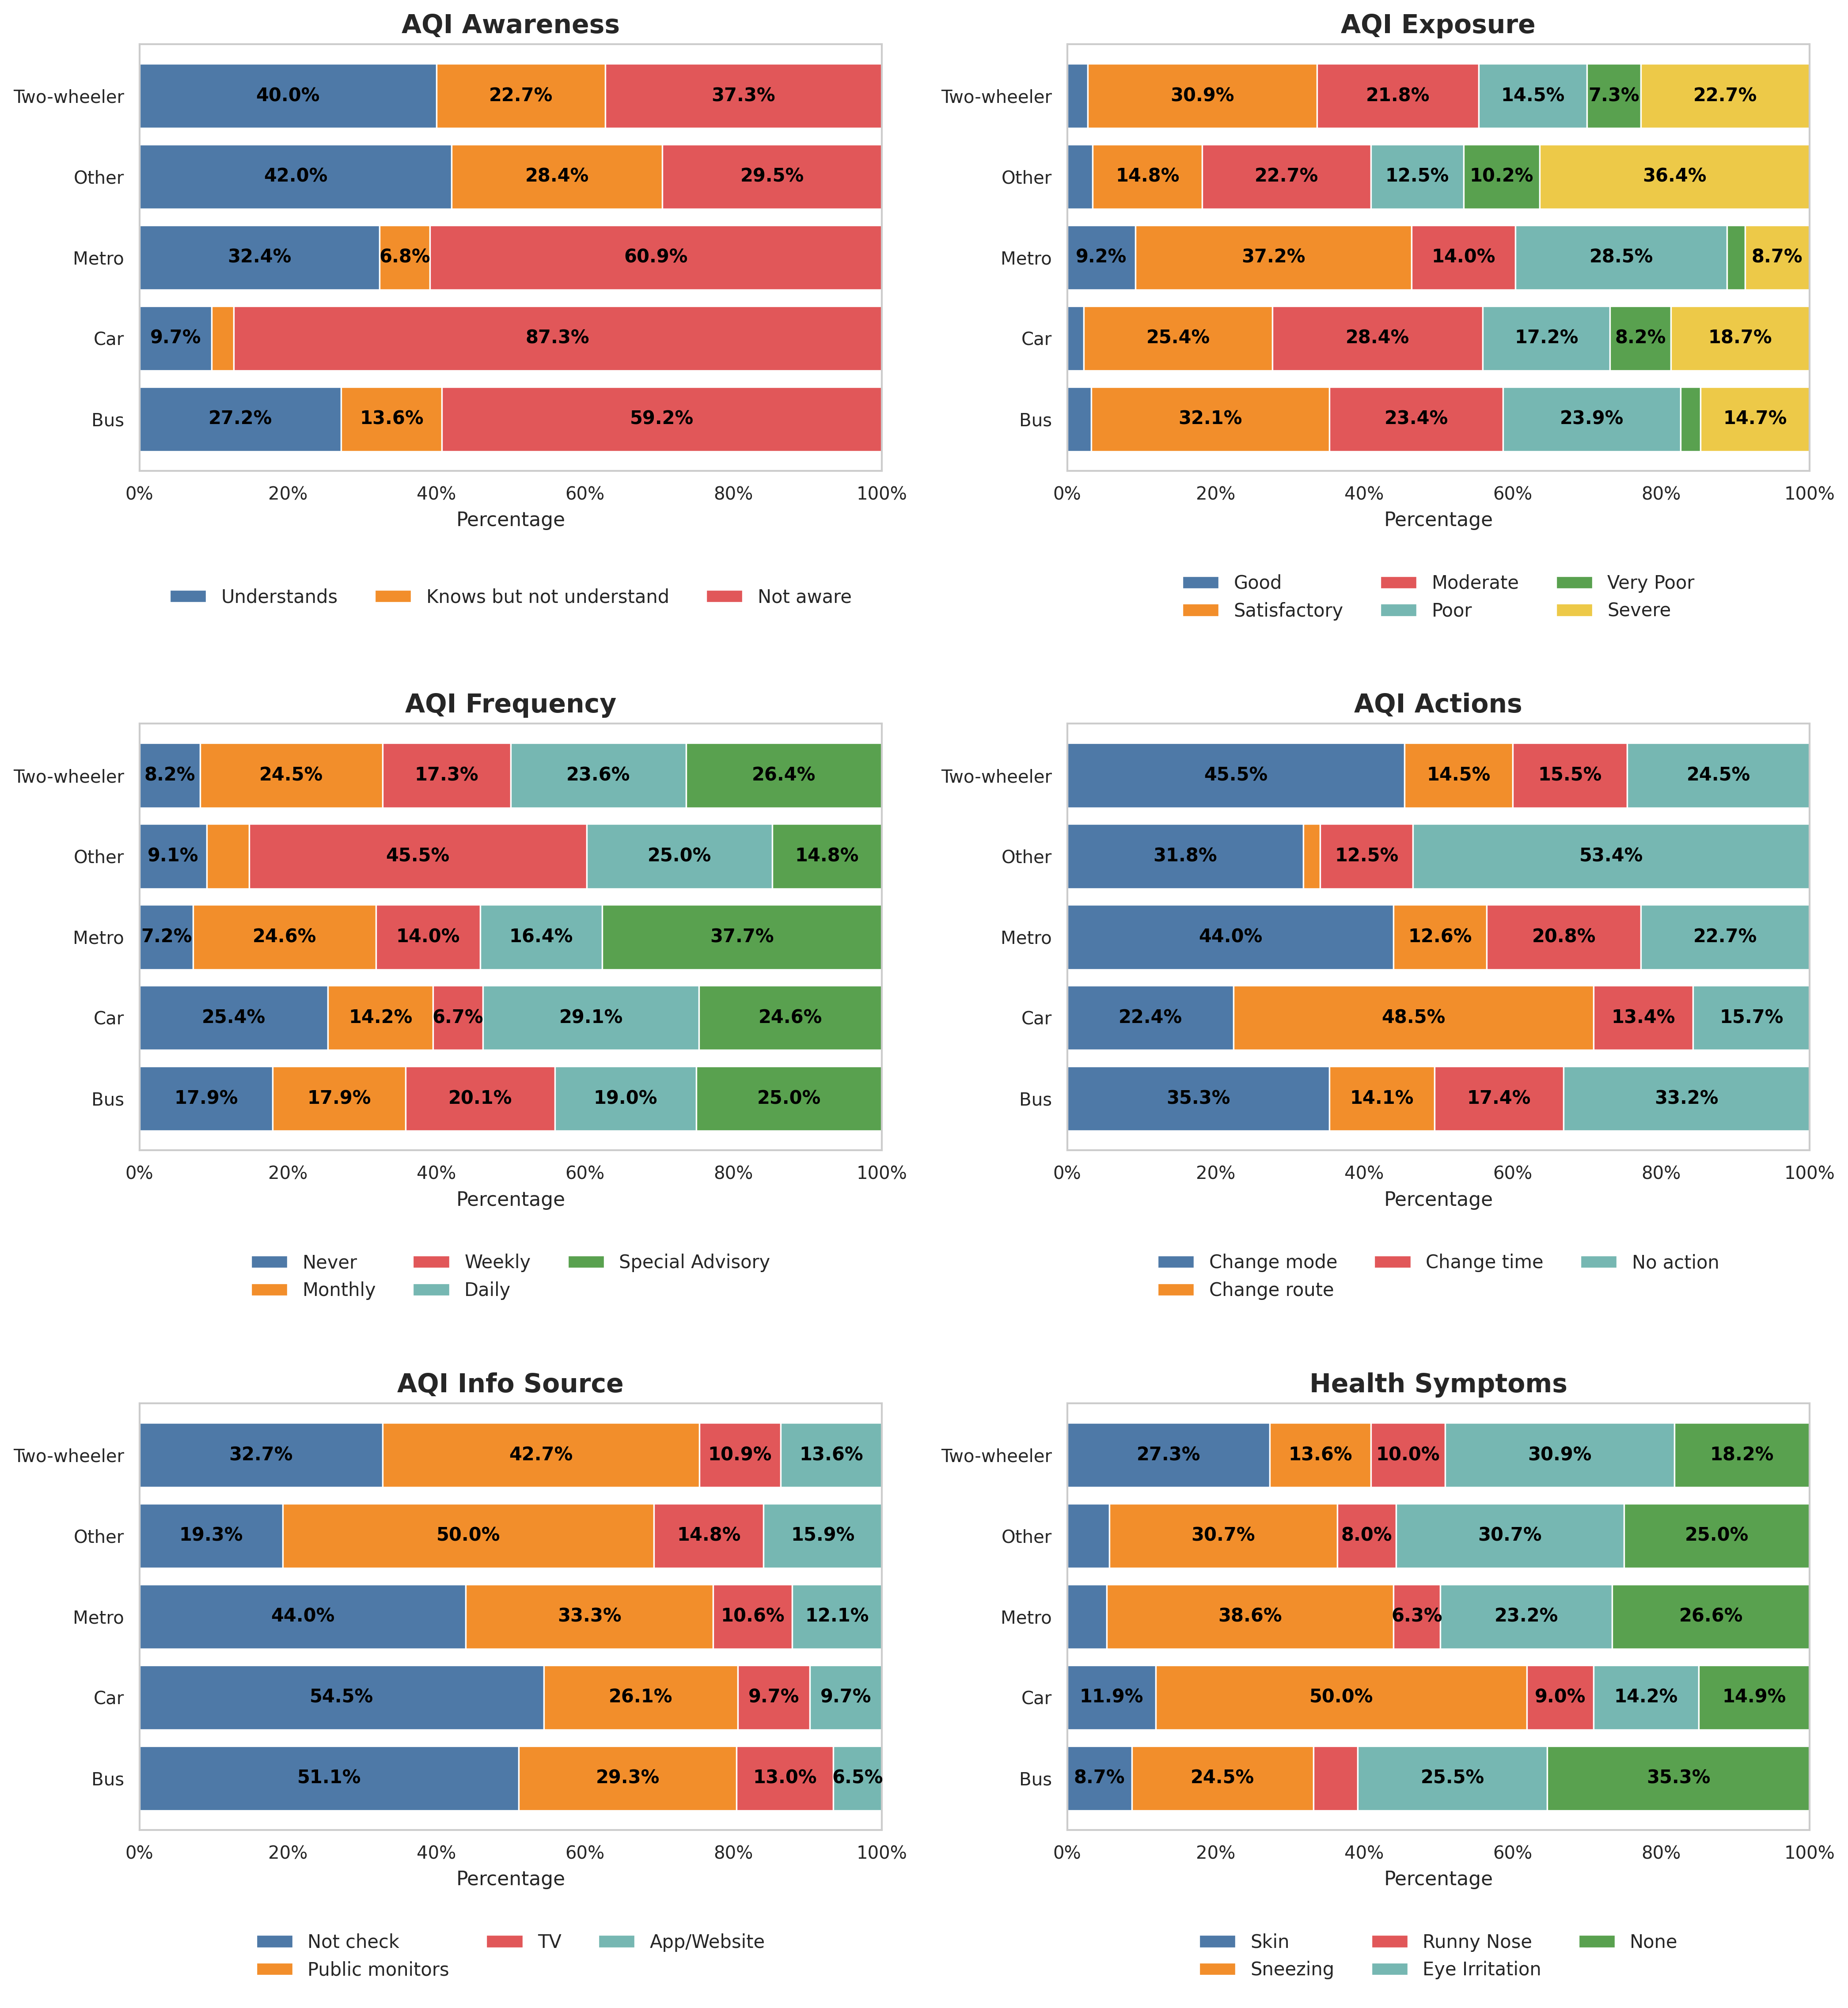

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.gridspec import GridSpec

aqi_vars = [
    "AQI Awareness",
    "AQI Exposure",
    "AQI Frequency",
    "AQI Actions",
    "AQI Info Source"
]
fig = plt.figure(figsize=(14, 16))
gs = GridSpec(
    6, 2,
    height_ratios=[1, 0.18, 1, 0.18, 1, 0.18],
    hspace=0.35,
    wspace=0.25
)

plot_axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1]),
    fig.add_subplot(gs[4, 0]),
    fig.add_subplot(gs[4, 1])
]

legend_axes = [
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[3, 0]),
    fig.add_subplot(gs[3, 1]),
    fig.add_subplot(gs[5, 0]),
    fig.add_subplot(gs[5, 1])
]

for lax in legend_axes:
    lax.axis("off")

def plot_stacked(ax, lax, df, cat_cols, labels, title):
    df_tmp = df.copy()
    df_tmp["tmp_cat"] = df_tmp[cat_cols].idxmax(axis=1)
    df_tmp["tmp_cat"] = df_tmp["tmp_cat"].replace(dict(zip(cat_cols, labels)))

    counts = (
        df_tmp
        .groupby(["travel_mode", "tmp_cat"])
        .size()
        .unstack(fill_value=0)
    )

    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    left = np.zeros(len(perc))
    handles = []

    for i, c in enumerate(perc.columns):
        bars = ax.barh(
            perc.index,
            perc[c],
            left=left,
            color=PAPER_COLORS[i % len(PAPER_COLORS)],
            edgecolor="white"
        )

        handles.append(bars[0])

        for j, val in enumerate(perc[c]):
            if val >= 6:
                ax.text(
                    left[j] + val / 2,
                    j,
                    f"{val:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=10,
                    weight="bold",
                    color="black"
                )

        left += perc[c]

    ax.set_title(title, fontsize=14, weight="bold", pad=6)
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.grid(False)

    lax.legend(
        handles,
        labels,
        loc="center",
        ncol=min(3, len(labels)),
        frameon=False,
        fontsize=10
    )

for ax, lax, var in zip(plot_axes[:5], legend_axes[:5], aqi_vars):
    cfg = category_groups[var]

    if "onehot" in cfg:
        cat_cols = cfg["onehot"]
    else:
        cat_cols = []
        for i, _ in enumerate(cfg["labels"], start=1):
            col = f"_tmp_{var}_{i}"
            df_modes[col] = (df_modes[cfg["col"]] == i).astype(int)
            cat_cols.append(col)

    plot_stacked(
        ax=ax,
        lax=lax,
        df=df_modes,
        cat_cols=cat_cols,
        labels=cfg["labels"],
        title=var
    )

extra_cfg = plot_configs[0]

plot_stacked(
    ax=plot_axes[5],
    lax=legend_axes[5],
    df=df_modes,
    cat_cols=extra_cfg["cols"],
    labels=extra_cfg["labels"],
    title=extra_cfg["title"]
)

plt.subplots_adjust(
    top=0.97,
    bottom=0.05,
    left=0.08,
    right=0.98
)

plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter

def plot_stacked_by_mode(
    df,
    category_cols,
    labels,
    title,
    colors
):
    """
    df            : dataframe with 'travel_mode'
    category_cols : list of columns OR a single column
    labels        : human-readable labels
    title         : plot title
    """

    fig, ax = plt.subplots(figsize=(7,5))
    if isinstance(category_cols, list):
        df = df.copy()
        df["tmp_cat"] = df[category_cols].idxmax(axis=1)
        df["tmp_cat"] = df["tmp_cat"].replace(
            dict(zip(category_cols, labels))
        )
    else:
        df["tmp_cat"] = df[category_cols].replace(
            {i+1: labels[i] for i in range(len(labels))}
        )

    counts = df.groupby(["travel_mode", "tmp_cat"]).size().unstack(fill_value=0)
    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    mode_totals = counts.sum(axis=1)
    y_labels = [f"{m} ({mode_totals[m]})" for m in perc.index]

    left = np.zeros(len(perc))

    for i, c in enumerate(perc.columns):
        ax.barh(
            y_labels,
            perc[c],
            left=left,
            color=colors[i % len(colors)],
            edgecolor="white",
            label=c
        )
        left += perc[c]

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.grid(False)

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.18),
        frameon=False,
        fontsize=10,
        ncol=2
    )

    plt.tight_layout()
    plt.show()

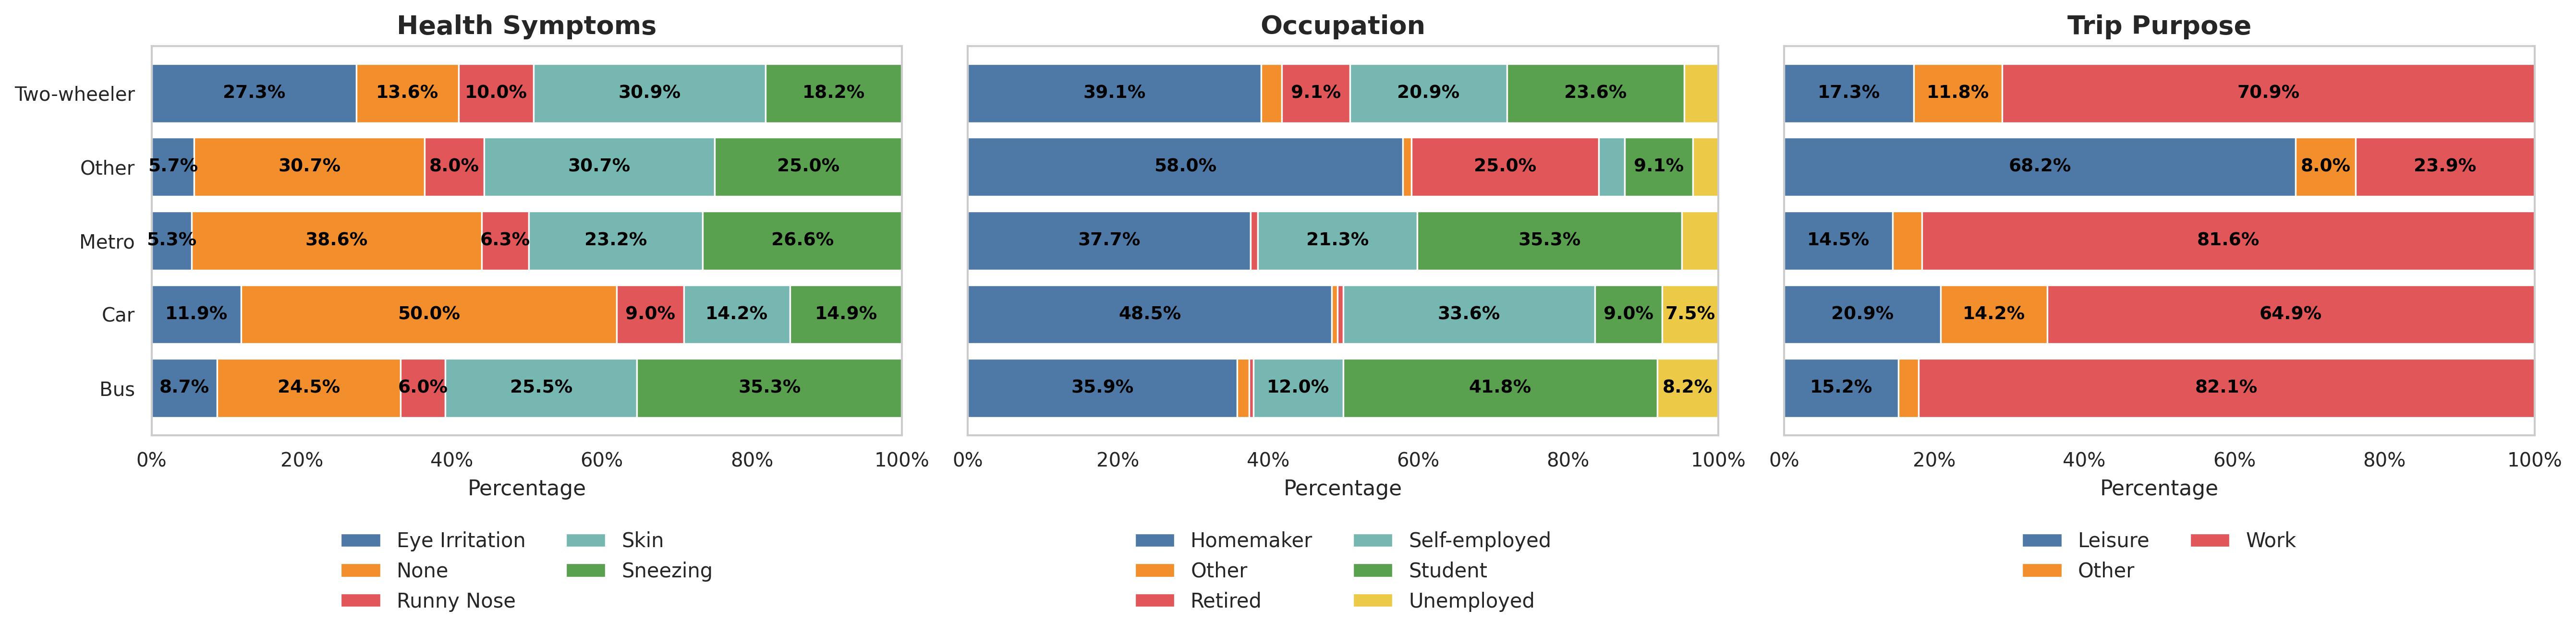

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, cfg in zip(axes, plot_configs):
    df_tmp = df_modes.copy()
    df_tmp["tmp_cat"] = df_tmp[cfg["cols"]].idxmax(axis=1)
    df_tmp["tmp_cat"] = df_tmp["tmp_cat"].replace(
        dict(zip(cfg["cols"], cfg["labels"]))
    )
    counts = (
        df_tmp
        .groupby(["travel_mode", "tmp_cat"])
        .size()
        .unstack(fill_value=0)
    )
    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    y_labels = perc.index.tolist()
    left = np.zeros(len(perc))
    for i, c in enumerate(perc.columns):
        values = perc[c].values

        ax.barh(
            y_labels,
            values,
            left=left,
            color=PAPER_COLORS[i % len(PAPER_COLORS)],
            edgecolor="white",
            label=c
        )
        for j, val in enumerate(values):
            if val >= 5:
                ax.text(
                    left[j] + val / 2,
                    j,
                    f"{val:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=9,
                    color="black",
                    weight="bold"
                )

        left += values

    ax.set_title(cfg["title"], fontsize=13, weight="bold")
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.grid(False)

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.20),
        frameon=False,
        fontsize=10,
        ncol=2
    )

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

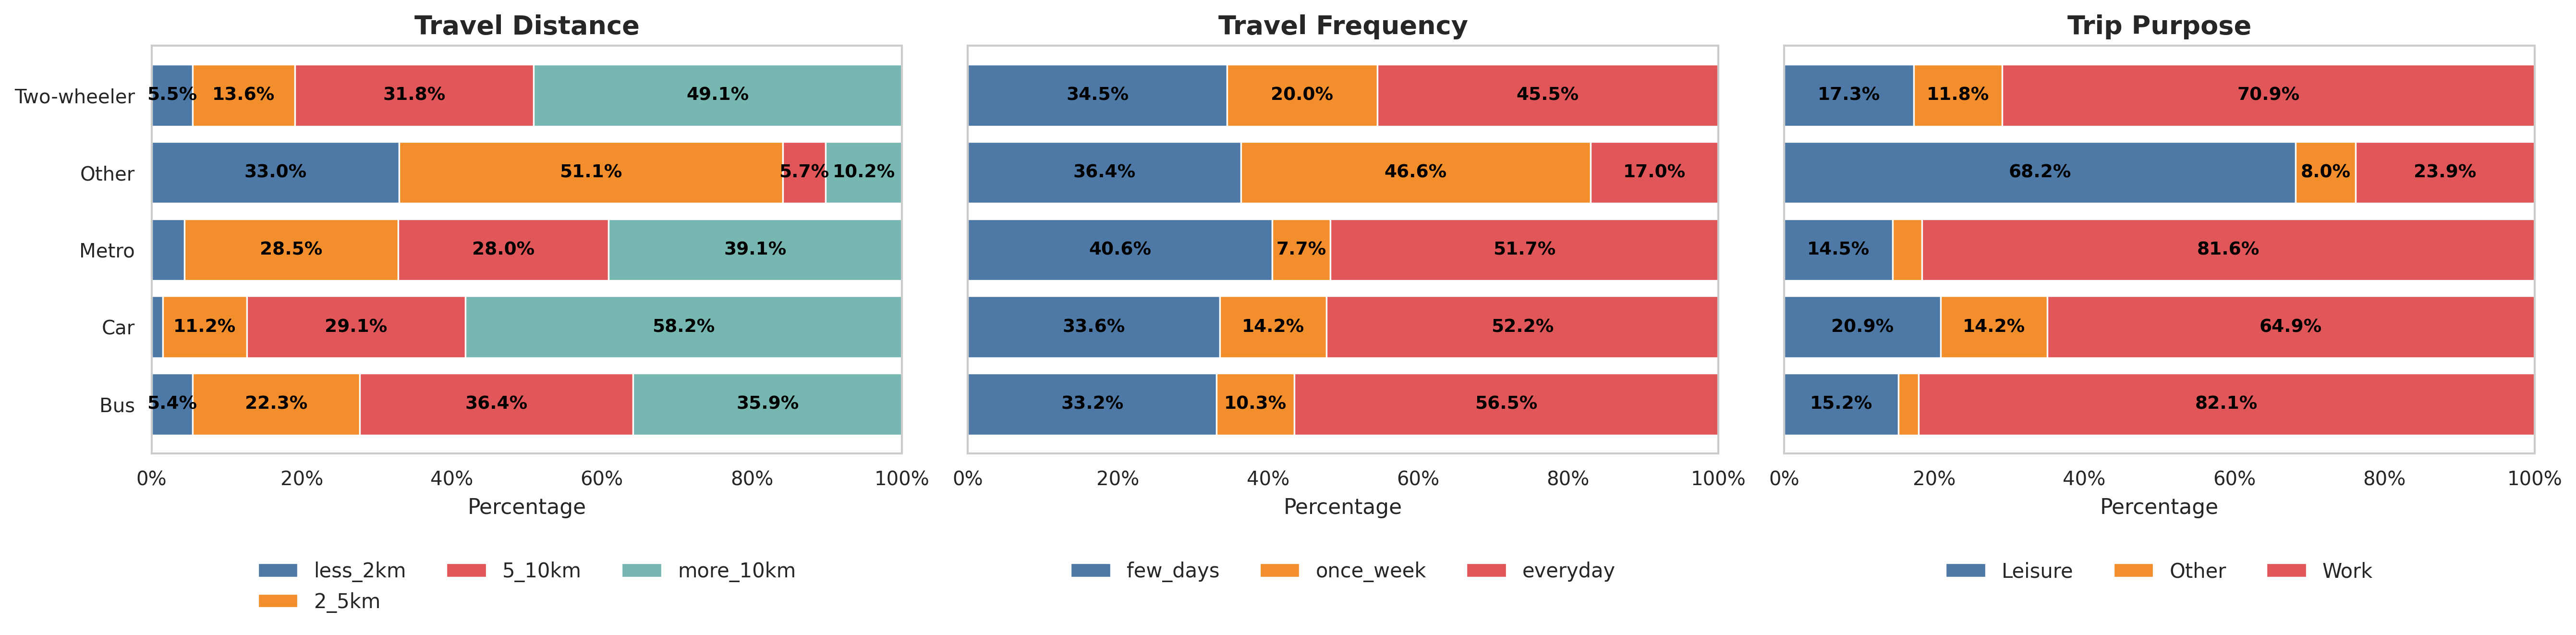

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

distance_map = {1: "less_2km", 2: "2_5km", 3: "5_10km", 4: "more_10km"}
frequency_map = {1: "few_days", 2: "once_week", 3: "everyday"}
distance_labels = list(distance_map.values())
frequency_labels = list(frequency_map.values())
plot_configs = [
    {
        "type": "mapped",
        "col": "distance",
        "map": distance_map,
        "labels": distance_labels,
        "title": "Travel Distance"
    },
    {
        "type": "mapped",
        "col": "frequency",
        "map": frequency_map,
        "labels": frequency_labels,
        "title": "Travel Frequency"
    },
    {
        "type": "onehot",
        "cols": ["purpose_work", "purpose_leisure", "purpose_other"],
        "labels": ["Work", "Leisure", "Other"],
        "title": "Trip Purpose"
    }
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, cfg in zip(axes, plot_configs):
    df_tmp = df_modes.copy()
    if cfg["type"] == "mapped":
        df_tmp["tmp_cat"] = df_tmp[cfg["col"]].map(cfg["map"])

        counts = (
            df_tmp
            .groupby(["travel_mode", "tmp_cat"])
            .size()
            .unstack(fill_value=0)
        )

        counts = counts.reindex(cfg["labels"], axis=1)

    else:
        df_tmp["tmp_cat"] = df_tmp[cfg["cols"]].idxmax(axis=1)
        df_tmp["tmp_cat"] = df_tmp["tmp_cat"].replace(
            dict(zip(cfg["cols"], cfg["labels"]))
        )

        counts = (
            df_tmp
            .groupby(["travel_mode", "tmp_cat"])
            .size()
            .unstack(fill_value=0)
        )

    perc = counts.div(counts.sum(axis=1), axis=0) * 100
    y_labels = perc.index.tolist()
    left = np.zeros(len(perc))
    for i, c in enumerate(perc.columns):
        values = perc[c].values

        ax.barh(
            y_labels,
            values,
            left=left,
            color=PAPER_COLORS[i % len(PAPER_COLORS)],
            edgecolor="white",
            label=c
        )

        for j, val in enumerate(values):
            if val >= 5:
                ax.text(
                    left[j] + val / 2,
                    j,
                    f"{val:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=9,
                    weight="bold",
                    color="black"
                )

        left += values

    ax.set_title(cfg["title"], fontsize=13, weight="bold")
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.grid(False)

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.22),
        frameon=False,
        fontsize=10,
        ncol=min(3, len(perc.columns))
    )

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.1)

In [ ]:
def plot_choice_comparison(ax, df, col, title):
    counts = (
        df.groupby([col, "chosen"])
        .size()
        .unstack(fill_value=0)
    )

    perc = counts.div(counts.sum(axis=1), axis=0) * 100

    perc.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=["#4C72B0", "#DD8452"],
        edgecolor="white",
        width=0.7,
        legend=False
    )

    ax.set_title(title, fontsize=11, weight="bold")
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel("")

    if col in LABEL_MAPS:
        labels = [LABEL_MAPS[col].get(i, str(i)) for i in perc.index]
        ax.set_xticklabels(labels, rotation=0)

    for i, (_, row) in enumerate(perc.iterrows()):
        cumulative = 0
        for val in row:
            if val > 6:
                ax.text(
                    i,
                    cumulative + val / 2,
                    f"{val:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=9,
                    color="white"
                )
            cumulative += val

In [ ]:
LABEL_MAPS = {
    "TravelTime": {20: "20 min", 30: "30 min", 40: "40 min"},
    "TravelCost": {15: "₹15", 25: "₹25", 35: "₹35"},
    "Delay": {1: "Low", 2: "Medium", 3: "High"},
    "AirQualityLevel": {
        1: "Good", 2: "Satisfactory", 3: "Moderate",
        4: "Poor", 5: "Very Poor", 6: "Severe"
    },
    "GreenCover": {1: "Low", 2: "Medium", 3: "High"},
    "PreTripInfoAvailable": {0: "No", 1: "Yes"},
    "TripPurpose": {1: "Work", 2: "Leisure", 3: "Other"}
}

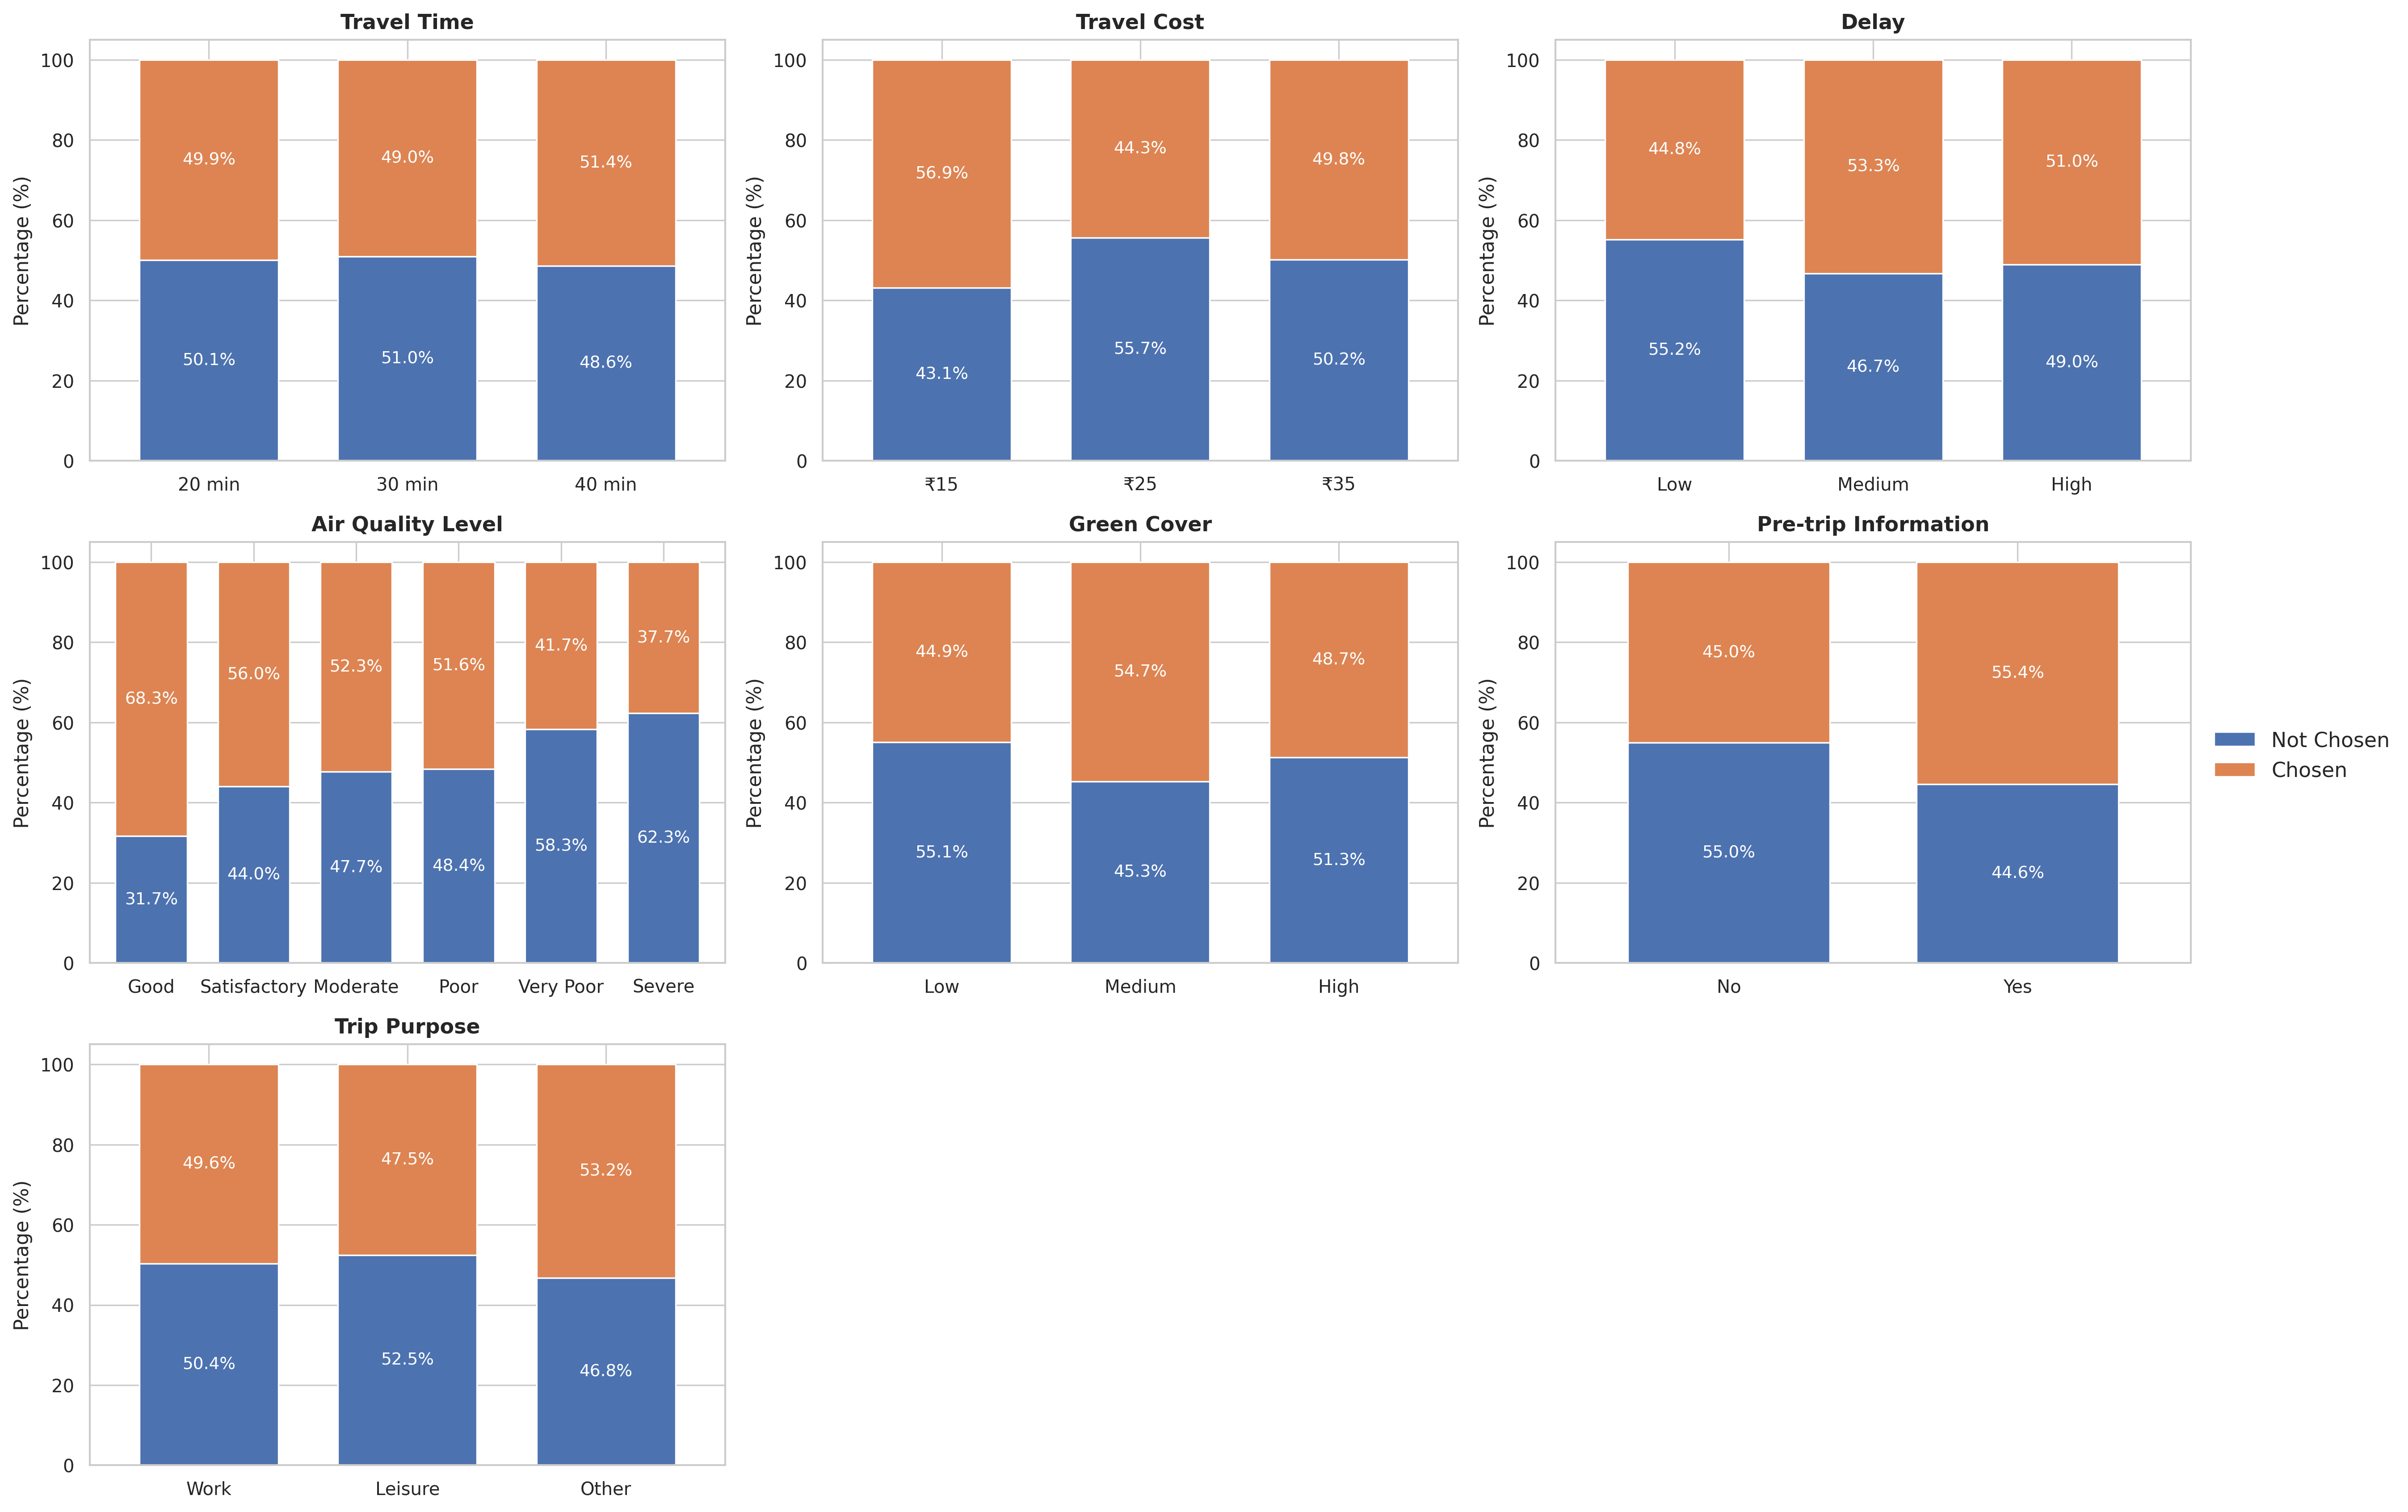

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

cols = [
    "TravelTime", "TravelCost", "Delay",
    "AirQualityLevel", "GreenCover", "PreTripInfoAvailable",
    "TripPurpose"
]

titles = [
    "Travel Time", "Travel Cost", "Delay",
    "Air Quality Level", "Green Cover", "Pre-trip Information",
    "Trip Purpose"
]

for ax, col, title in zip(axes, cols, titles):
    plot_choice_comparison(ax, df, col, f"{title}")

for ax in axes[len(cols):]:
    ax.axis("off")

fig.legend(
    ["Not Chosen", "Chosen"],
    loc="center right",
    frameon=False,
    fontsize=11
)

plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()

## Data Preprocessing

In [ ]:
import pandas as pd

long_df = pd.read_excel("final_data2.xlsx")
#long_df = pd.read_excel("data.xlsx")

In [ ]:
from sklearn.preprocessing import StandardScaler
long_df = long_df.drop(['alt'], axis=1)
cols = ['Air Pollution Awareness',
        'Pro-Public Transport Attitude',
        'Tech-Enabled Eco-Travel']

scaler = StandardScaler()
long_df[cols] = scaler.fit_transform(long_df[cols])

In [ ]:
long_df = long_df.drop(['Unnamed: 0'], axis=1)

## Feature Engineering

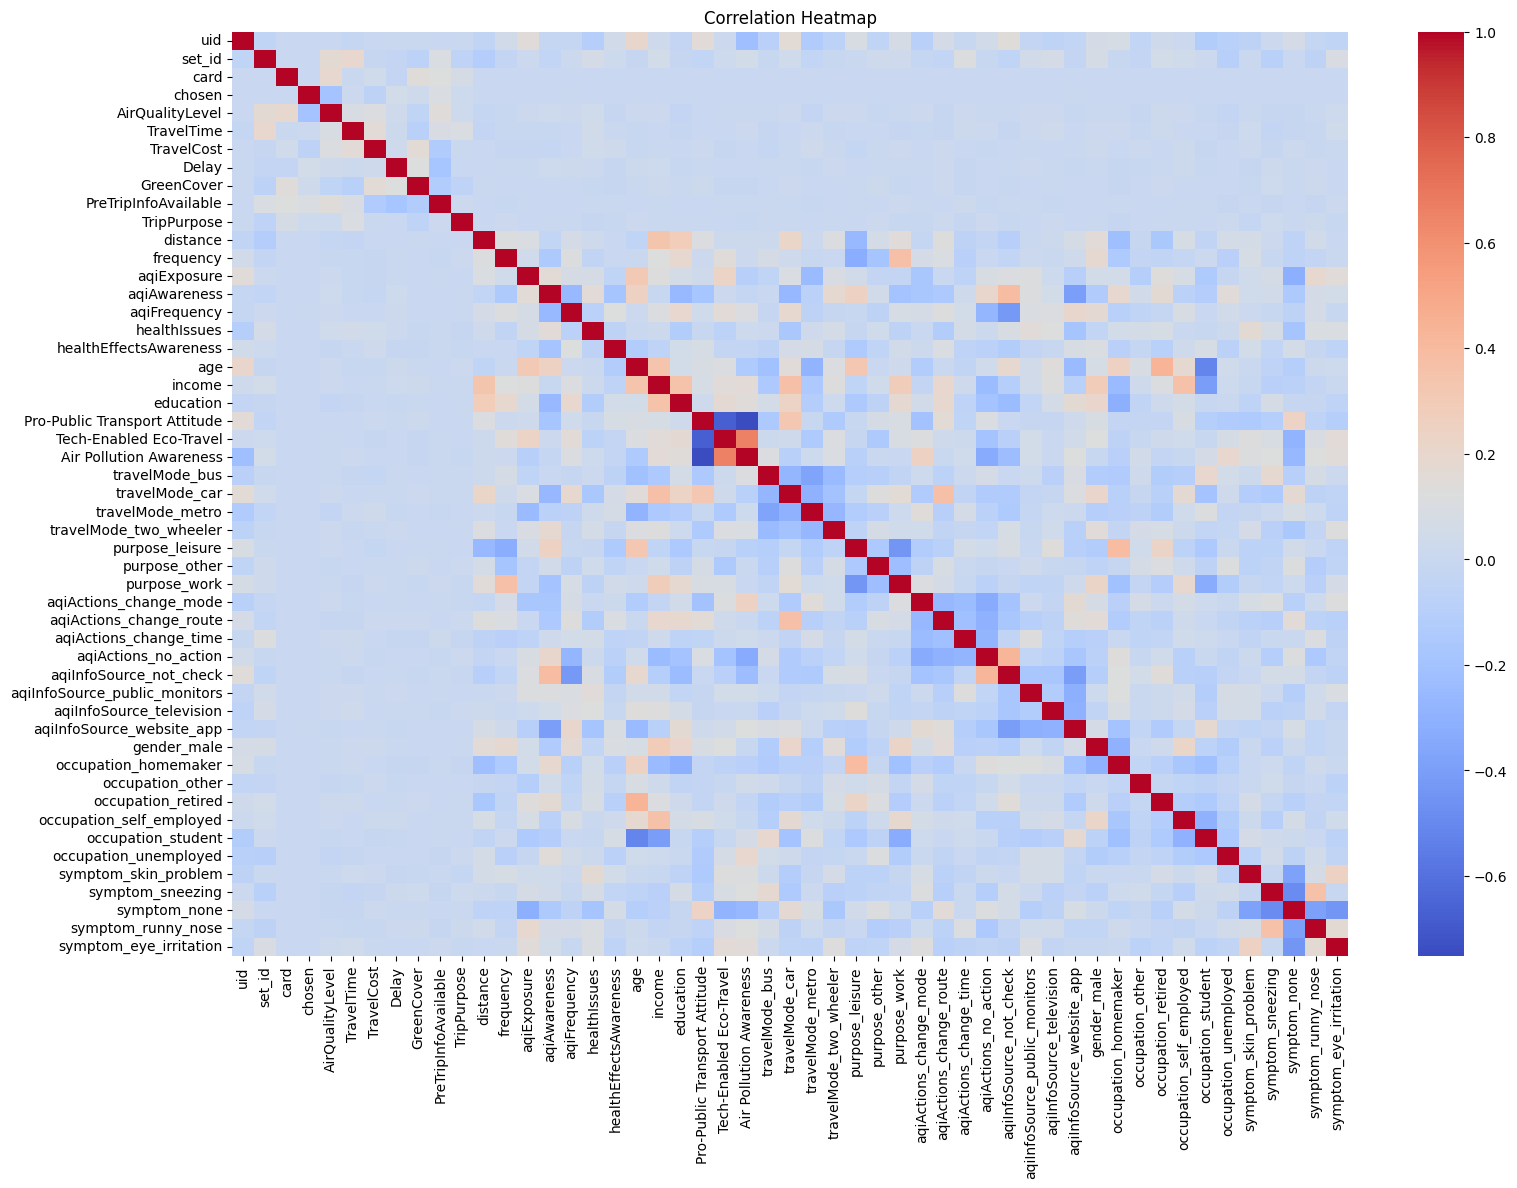

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = long_df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import numpy as np

def get_high_correlations(df, threshold=0.5):
    corr = df.corr()
    pairs = []
    for i in corr.columns:
        for j in corr.columns:
            if i != j:
                if abs(corr.loc[i, j]) > threshold:
                    pairs.append((i, j, corr.loc[i, j]))
    return pairs

high_corr_pairs = get_high_correlations(long_df, threshold=0.3)

for p in high_corr_pairs:
    print(f"{p[0]} ↔ {p[1]}  | corr = {p[2]:.2f}")

distance ↔ income  | corr = 0.34
frequency ↔ purpose_leisure  | corr = -0.32
frequency ↔ purpose_work  | corr = 0.37
aqiExposure ↔ age  | corr = 0.31
aqiExposure ↔ symptom_none  | corr = -0.32
aqiAwareness ↔ aqiInfoSource_not_check  | corr = 0.39
aqiAwareness ↔ aqiInfoSource_website_app  | corr = -0.40
aqiFrequency ↔ aqiInfoSource_not_check  | corr = -0.42
age ↔ aqiExposure  | corr = 0.31
age ↔ income  | corr = 0.35
age ↔ purpose_leisure  | corr = 0.33
age ↔ occupation_retired  | corr = 0.44
age ↔ occupation_student  | corr = -0.51
income ↔ distance  | corr = 0.34
income ↔ age  | corr = 0.35
income ↔ education  | corr = 0.36
income ↔ travelMode_car  | corr = 0.37
income ↔ occupation_self_employed  | corr = 0.36
income ↔ occupation_student  | corr = -0.41
education ↔ income  | corr = 0.36
education ↔ occupation_homemaker  | corr = -0.31
Pro-Public Transport Attitude ↔ Tech-Enabled Eco-Travel  | corr = -0.67
Pro-Public Transport Attitude ↔ Air Pollution Awareness  | corr = -0.75
Pro-Publ

In [ ]:
long_df['Pollution_Exposure_TravelTime'] = long_df['aqiExposure']*long_df['TravelTime']

In [ ]:
long_df["Cost_x_Income"] = long_df["TravelCost"] * long_df["income"]
long_df["Time_x_Age"] = long_df["TravelTime"] * long_df["age"]
long_df["AQI_x_Education"] = long_df["AirQualityLevel"] * long_df["education"]
long_df["Delay_x_Frequency"] = long_df["Delay"] * long_df["frequency"]
long_df["Cost_per_Time"] = long_df["TravelCost"] / (long_df["TravelTime"] + 1e-5)
long_df["Delay_per_Time"] = long_df["Delay"] / (long_df["TravelTime"] + 1e-5)
long_df["AQI_per_Time"] = long_df["AirQualityLevel"] / (long_df["TravelTime"] + 1e-5)
long_df["GreenCover_per_Delay"] = long_df["GreenCover"] / (long_df["Delay"] + 1)

## ML Model Training and Evaluation



In [ ]:
X = long_df.drop(['chosen', 'uid', 'set_id', 'card'], axis=1)
y = long_df['chosen']

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import log_loss
def cross_entropy_loss(y_true, y_prob):
    return log_loss(y_true, y_prob)
def focal_loss(y_true, y_prob, gamma=2.0, eps=1e-9):
    y_true = np.array(y_true)
    y_prob = np.clip(y_prob, eps, 1 - eps)
    pt = np.where(y_true == 1, y_prob, 1 - y_prob)
    loss = -((1 - pt) ** gamma) * np.log(pt)
    return np.mean(loss)
def kl_divergence(y_true, y_prob, eps=1e-9):
    y_true = np.array(y_true)
    y_prob = np.clip(y_prob, eps, 1 - eps)
    kl = 0.0
    n = len(y_true)
    for i in range(n):
        if y_true[i] == 1:
            kl += np.log(1.0 / y_prob[i])
        else:
            kl += np.log(1.0 / (1 - y_prob[i]))
    return kl / n

### Without Feature Engineering

#### XGBoost

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.7865168539325843
Precision =  0.7739130434782608
Recall =  0.791814946619217
F1 =  0.7827616534740546


In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

ce_xgb = cross_entropy_loss(y_test, y_prob_xgb)
focal_xgb = focal_loss(y_test, y_prob_xgb)
kl_xgb = kl_divergence(y_test, y_prob_xgb)

print("XGBoost:")
print("Cross Entropy:", ce_xgb)
print("Focal Loss:", focal_xgb)
print("KL Divergence:", kl_xgb)

XGBoost:
Cross Entropy: 0.49132180454674124
Focal Loss: 0.27350414
KL Divergence: 0.4913223


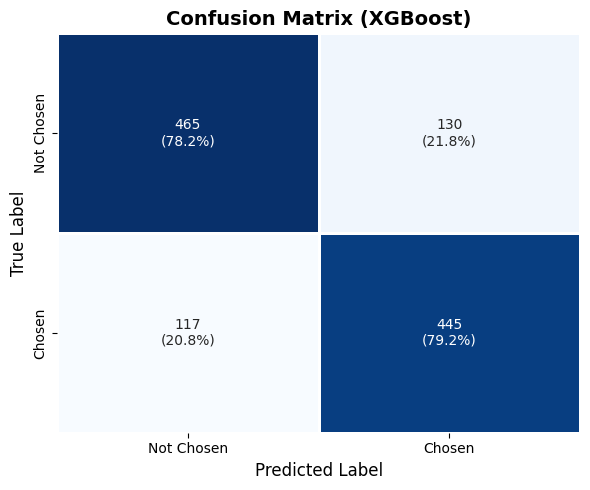

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (XGBoost)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=400)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.8055315471045809
Precision =  0.8003565062388592
Recall =  0.798932384341637
F1 =  0.7996438112199465


In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

ce_rf = cross_entropy_loss(y_test, y_prob_rf)
focal_rf = focal_loss(y_test, y_prob_rf)
kl_rf = kl_divergence(y_test, y_prob_rf)

print("Random Forest:")
print("Cross Entropy:", ce_rf)
print("Focal Loss:", focal_rf)
print("KL Divergence:", kl_rf)

Random Forest:
Cross Entropy: 0.42543814711656763
Focal Loss: 0.1021004097585338
KL Divergence: 0.42543814711656674


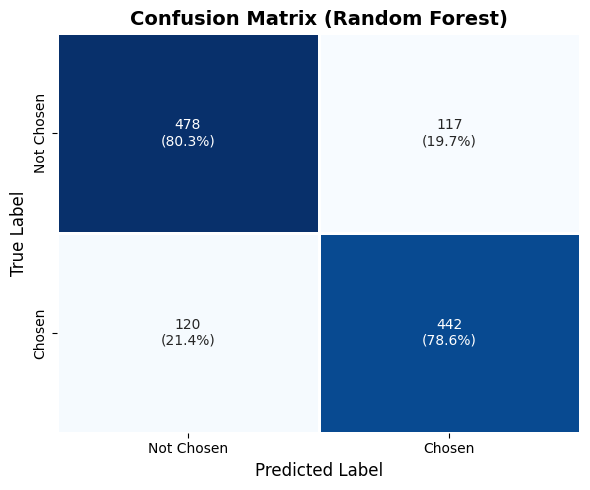

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Random Forest)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=42
)

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2325, number of negative: 2302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 4627, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502485 -> initscore=0.009942
[LightGBM] [Info] Start training from score 0.009942
Accuracy =  0.759723422644771
Precision =  0.7591240875912408
Recall =  0.7402135231316725
F1 =  0.7495495495495496


In [ ]:
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

ce_lgbm = cross_entropy_loss(y_test, y_prob_lgbm)
focal_lgbm = focal_loss(y_test, y_prob_lgbm)
kl_lgbm = kl_divergence(y_test, y_prob_lgbm)

print("LightGBM:")
print("Cross Entropy:", ce_lgbm)
print("Focal Loss:", focal_lgbm)
print("KL Divergence:", kl_lgbm)

LightGBM:
Cross Entropy: 0.5038001857003188
Focal Loss: 0.16139103235124094
KL Divergence: 0.503800185700319


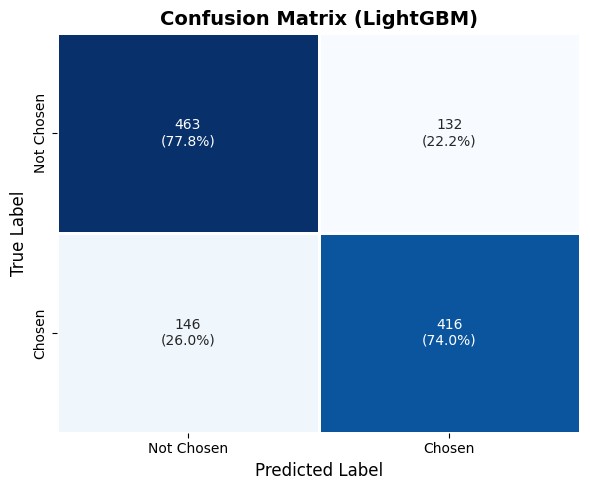

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (LightGBM)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier(verbose=0)

cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.7761452031114953
Precision =  0.7700534759358288
Recall =  0.7686832740213523
F1 =  0.7693677649154052


In [ ]:
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]

ce_cat = cross_entropy_loss(y_test, y_prob_cat)
focal_cat = focal_loss(y_test, y_prob_cat)
kl_cat = kl_divergence(y_test, y_prob_cat)

print("CatBoost:")
print("Cross Entropy:", ce_cat)
print("Focal Loss:", focal_cat)
print("KL Divergence:", kl_cat)

CatBoost:
Cross Entropy: 0.48293127812191755
Focal Loss: 0.14516612518627006
KL Divergence: 0.48293127812191766


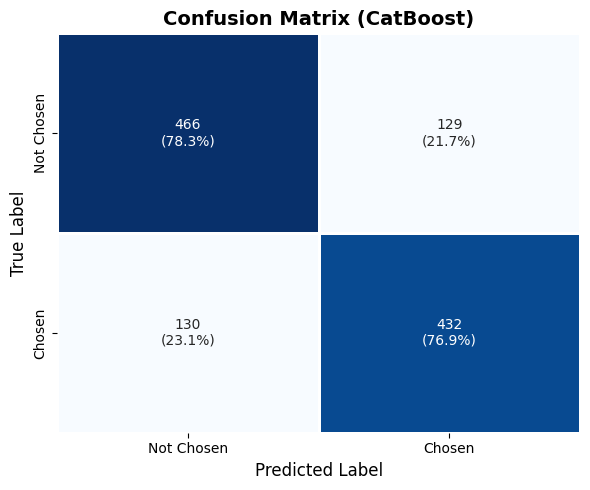

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (CatBoost)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### AUC Metric for all models

In [ ]:
from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_lgb = roc_auc_score(y_test, y_prob_lgbm)
auc_cat = roc_auc_score(y_test, y_prob_cat)
print("AUC RF:", auc_rf)
print("AUC XGB:", auc_xgb)
print("AUC LGB:", auc_lgb)
print("AUC Cat:", auc_cat)

AUC RF: 0.90357965250157
AUC XGB: 0.859496396423338
AUC LGB: 0.8354077574090134
AUC Cat: 0.8546756781004217


### With Feature Engineering

#### XGBoost

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.8020743301642178
Precision =  0.7915936952714536
Recall =  0.8042704626334519
F1 =  0.7978817299205648


In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

ce_xgb = cross_entropy_loss(y_test, y_prob_xgb)
focal_xgb = focal_loss(y_test, y_prob_xgb)
kl_xgb = kl_divergence(y_test, y_prob_xgb)

print("XGBoost:")
print("Cross Entropy:", ce_xgb)
print("Focal Loss:", focal_xgb)
print("KL Divergence:", kl_xgb)

XGBoost:
Cross Entropy: 0.4623767418661942
Focal Loss: 0.25001997
KL Divergence: 0.46237707


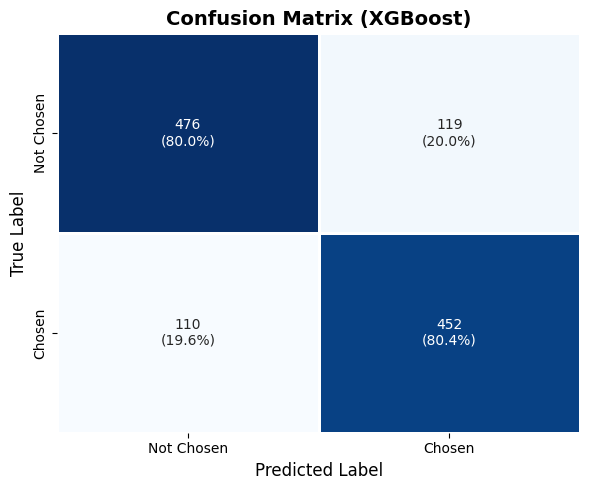

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (XGBoost)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=400)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.8072601555747623
Precision =  0.8087431693989071
Recall =  0.7900355871886121
F1 =  0.7992799279927992


In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

ce_rf = cross_entropy_loss(y_test, y_prob_rf)
focal_rf = focal_loss(y_test, y_prob_rf)
kl_rf = kl_divergence(y_test, y_prob_rf)

print("Random Forest:")
print("Cross Entropy:", ce_rf)
print("Focal Loss:", focal_rf)
print("KL Divergence:", kl_rf)

Random Forest:
Cross Entropy: 0.40416504099877937
Focal Loss: 0.10449407835840974
KL Divergence: 0.4041650409996434


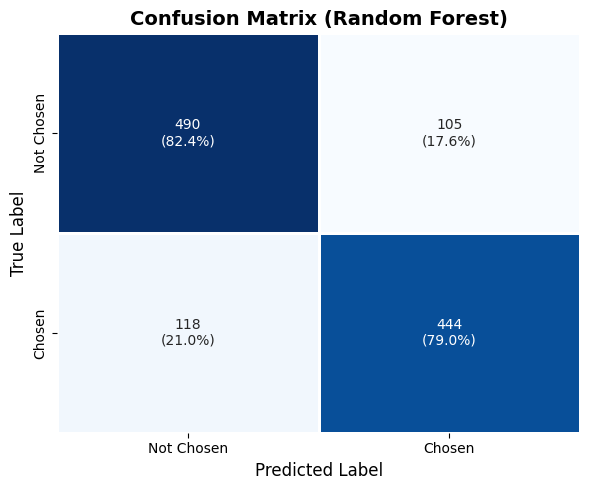

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Random Forest)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=42
)

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2325, number of negative: 2302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 4627, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502485 -> initscore=0.009942
[LightGBM] [Info] Start training from score 0.009942
Accuracy =  0.773552290406223
Precision =  0.7688172043010753
Recall =  0.7633451957295374
F1 =  0.7660714285714286


In [ ]:
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

ce_lgbm = cross_entropy_loss(y_test, y_prob_lgbm)
focal_lgbm = focal_loss(y_test, y_prob_lgbm)
kl_lgbm = kl_divergence(y_test, y_prob_lgbm)

print("LightGBM:")
print("Cross Entropy:", ce_lgbm)
print("Focal Loss:", focal_lgbm)
print("KL Divergence:", kl_lgbm)

LightGBM:
Cross Entropy: 0.4907257674264358
Focal Loss: 0.1570395532871292
KL Divergence: 0.4907257674264359


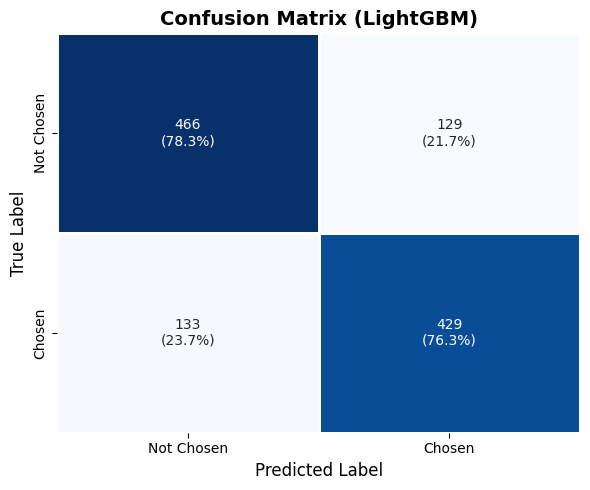

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (LightGBM)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### CatBoost

In [ ]:
cat_model = CatBoostClassifier(verbose=0)

cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 = ", f1_score(y_test, y_pred))

Accuracy =  0.7821953327571305
Precision =  0.779783393501805
Recall =  0.7686832740213523
F1 =  0.7741935483870968


In [ ]:
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]

ce_cat = cross_entropy_loss(y_test, y_prob_cat)
focal_cat = focal_loss(y_test, y_prob_cat)
kl_cat = kl_divergence(y_test, y_prob_cat)

print("CatBoost:")
print("Cross Entropy:", ce_cat)
print("Focal Loss:", focal_cat)
print("KL Divergence:", kl_cat)

CatBoost:
Cross Entropy: 0.4735358119596941
Focal Loss: 0.1411737191708337
KL Divergence: 0.47353581195969385


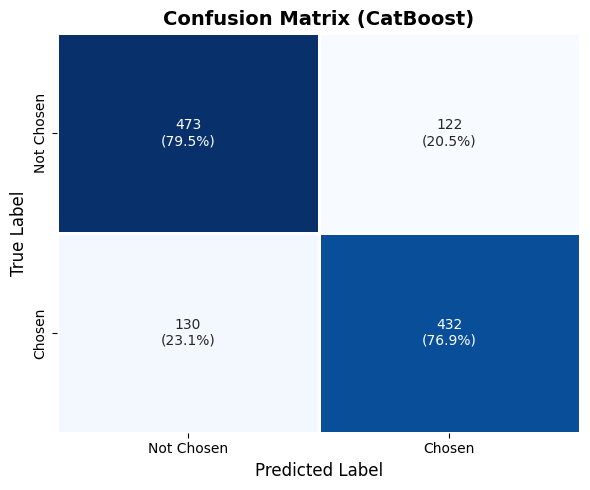

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True) * 100
class_names = ["Not Chosen", "Chosen"]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1f}%)"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False,
    linewidths=0.8,
    linecolor="white"
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (CatBoost)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

#### AUC Metric for all models

In [ ]:
from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_lgb = roc_auc_score(y_test, y_prob_lgbm)
auc_cat = roc_auc_score(y_test, y_prob_cat)
print("AUC RF:", auc_rf)
print("AUC XGB:", auc_xgb)
print("AUC LGB:", auc_lgb)
print("AUC Cat:", auc_cat)

AUC RF: 0.9115045306378781
AUC XGB: 0.8718442537157213
AUC LGB: 0.8458297197882712
AUC Cat: 0.8625228027153923


## Plots

In [ ]:
img_paths = ["cm_rf.png", "cm_xgb.png", "cm_lgbm.png", "cm_catboost.png"]
titles = ["(a) RF", "(b) XGBoost", "(c) LightGBM", "(d) CatBoost"]

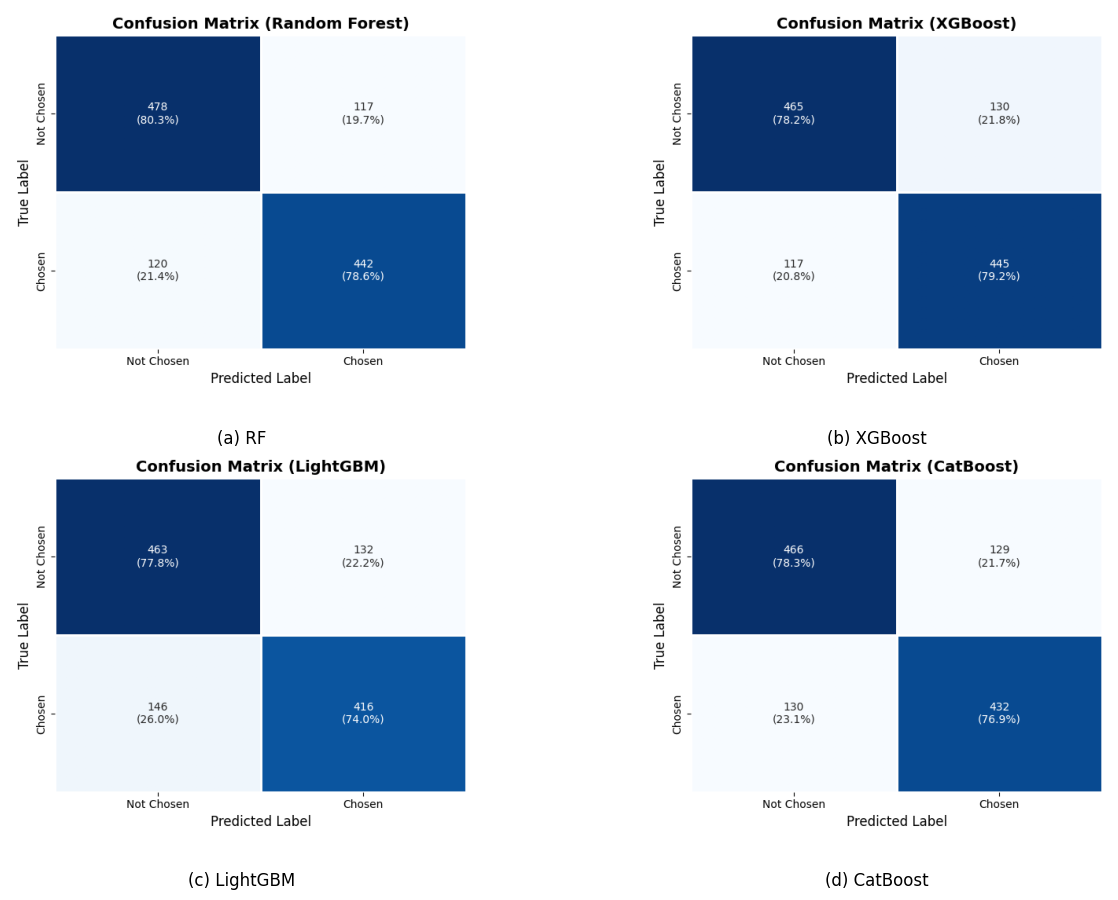

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 2, figsize=(14, 9))

for ax, img_path, title in zip(axes.flatten(), img_paths, titles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=12, y=-0.15)

plt.tight_layout()
plt.show()

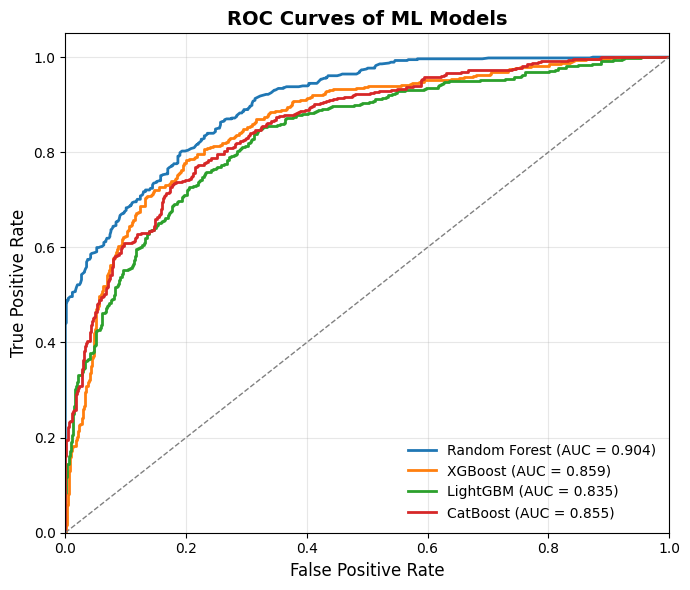

In [ ]:
from sklearn.metrics import roc_curve, auc

rf_probs  = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
lgb_probs = lgbm_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]

models = {
    "Random Forest": rf_probs,
    "XGBoost": xgb_probs,
    "LightGBM": lgb_probs,
    "CatBoost": cat_probs
}

plt.figure(figsize=(7, 6))
for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        lw=2,
        label=f"{name} (AUC = {roc_auc:.3f})"
    )
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves of ML Models", fontsize=14, weight="bold")
plt.legend(loc="lower right", frameon=False)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

### Without Feature Engineering

In [ ]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.7894889965559512)

In [ ]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.7910041445333021)

In [ ]:
scores = cross_val_score(lgbm_model, X_train, y_train, cv=5)
scores.mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1860, number of negative: 1841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 3701, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502567 -> initscore=0.010268
[LightGBM] [Info] Start training from score 0.010268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1860, number of negative: 1841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

np.float64(0.7622648998890899)

In [ ]:
scores = cross_val_score(cat_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.7802008055571771)

### With Feature Engineering

In [ ]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.7981364777304303)

In [ ]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.8065642402661842)

In [ ]:
scores = cross_val_score(lgbm_model, X_train, y_train, cv=5)
scores.mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1860, number of negative: 1841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 3701, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502567 -> initscore=0.010268
[LightGBM] [Info] Start training from score 0.010268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1860, number of negative: 1841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

np.float64(0.7726360399276166)

In [ ]:
scores = cross_val_score(cat_model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.7801989375985057)

## Feature Importance

#### Without Feature Engineering

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap_values_class1 = shap_values[:, :, 1]

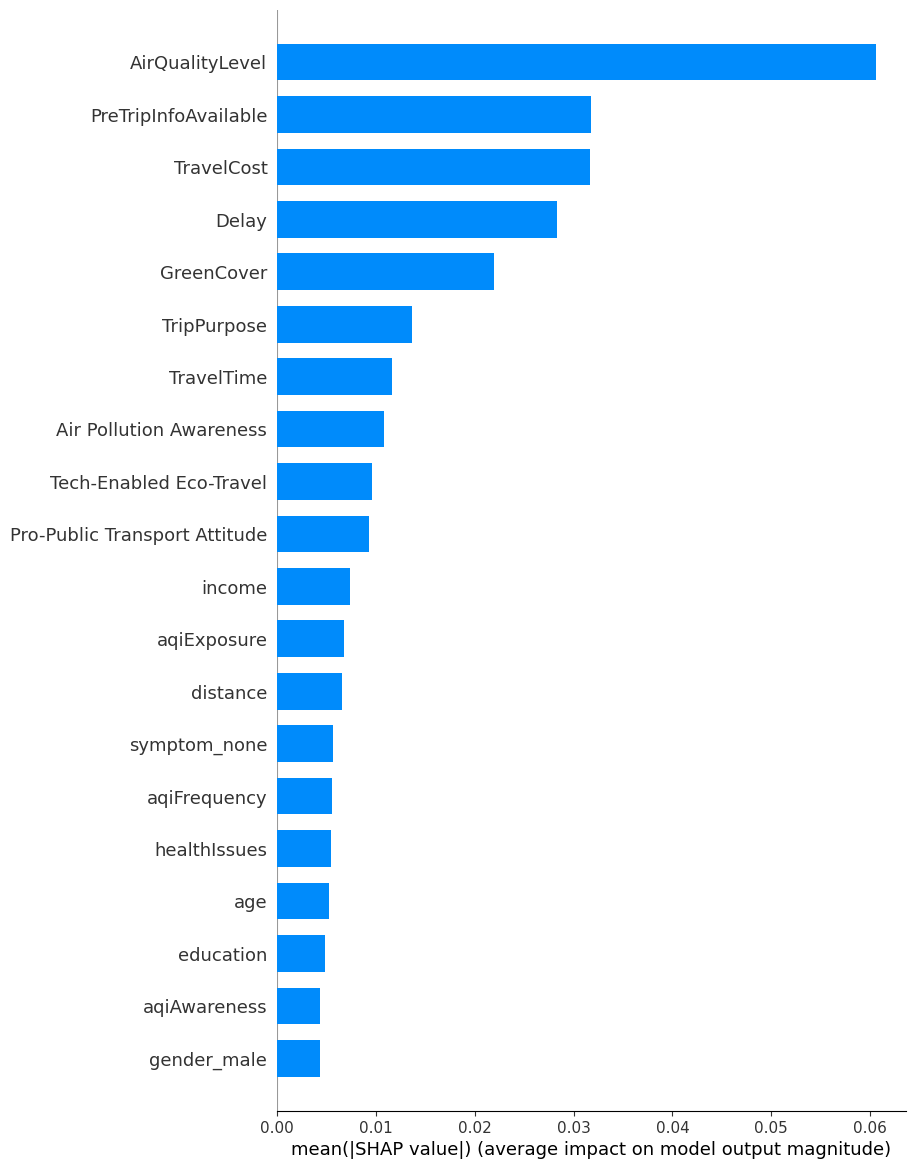

In [ ]:
shap.summary_plot(
    shap_values_class1,
    X_test,
    plot_type="bar",
    show=False
)

fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)")
plt.savefig("rf_shap_bar.png", dpi=300)
plt.show()

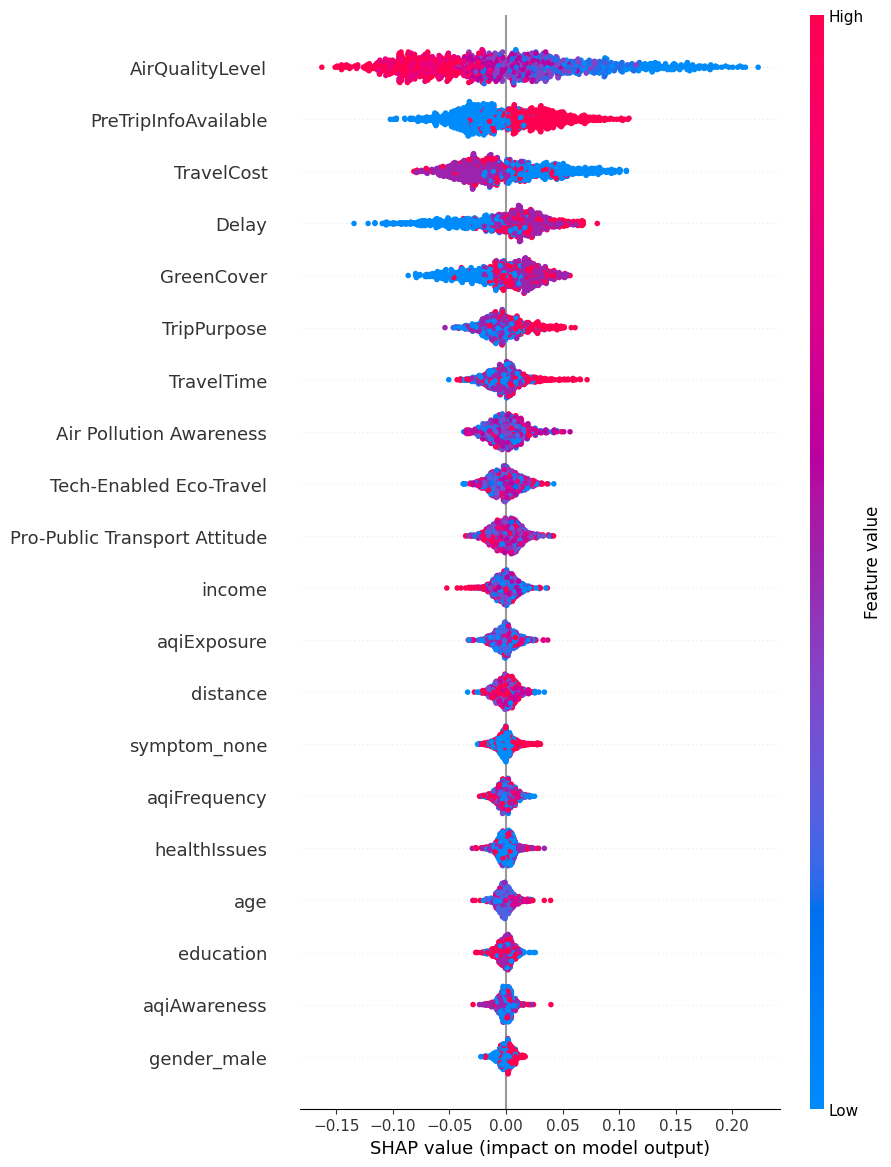

In [ ]:
shap.summary_plot(shap_values_class1, X_test, show=False)
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.savefig("rf_shap.png", dpi=300)
plt.show()

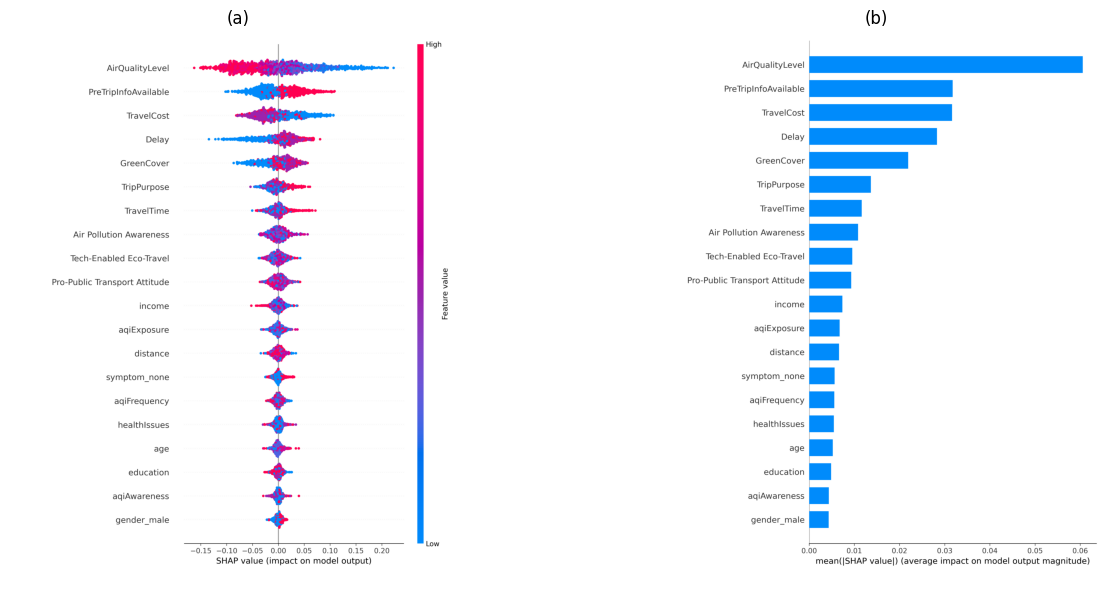

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img_beeswarm = Image.open("rf_shap.png")
img_bar = Image.open("rf_shap_bar.png")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(img_beeswarm)
axes[0].axis("off")
axes[0].set_title("(a)", fontsize=12)

axes[1].imshow(img_bar)
axes[1].axis("off")
axes[1].set_title("(b)", fontsize=12)

plt.tight_layout()
plt.savefig("rf_shap_combined.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
distance = {'less_2km': 1, '2_5km': 2, '5_10km':3, 'more_10km':4}
age = {'15-19': 1, '20-29': 2, '30-44': 3, '44-59': 4, '60_above': 5}
income = {
    'no_income': 1,
    'less_25k': 2,
    '25_50k': 3,
    '50_1lakh': 4,
    '1_1_5lakh': 5,
    'above_1_5lakh': 6
}
frequency = {
    'few_days': 1,
    'once_week': 2,
    'everyday': 3
}
apiFreq = {
    'never': 1,
    'monthly': 2,
    'weekly': 3,
    'daily': 4,
    'special_advisory': 5
}
edu = {
    'grade_10_or_below': 1,
    'intermediate': 2,
    'graduate': 3,
    'postgraduate_above': 4
}
healthIssues = {'no': 0, 'yes': 1, 'dont_know': 2}
healthEffectsAwareness = {'no': 0, 'yes': 1, 'dont_know': 2}
travelMode = {'car': 1, 'metro': 2, 'bus': 3, 'two_wheeler': 4, 'auto_rickshaw': 5}
purpose = {'work': 1, 'leisure': 2, 'education': 3, 'other': 4}
aqiActions = {'change_mode': 1, 'no_action': 2, 'avoid_travel': 3, 'change_route': 4, 'change_time': 5}
aqiExposure = {
    'good': 1,
    'satisfactory': 2,
    'moderate': 3,
    'poor': 4,
    'very_poor': 5,
    'severe': 6
}
aqiInfoSource = {'website_app': 1, 'newspaper': 2, 'television': 3, 'not_check': 4, 'public_monitors': 5}
gender = {'male': 0, 'female': 1}
occupation = {'employee': 1, 'homemaker': 2, 'student': 3, 'self_employed': 4, 'unemployed': 5, 'retired': 6, 'other': 7}
aqiAwareness = {'aware_understand': 1, 'aware_no_understand': 2, 'not_aware': 3}
AQL = {
    'Good (0-50)': 1,
    'Satisfactory (51-100)': 2,
    'Moderate (101-200)': 3,
    'Poor (201-300)': 4,
    'Very Poor (301-400)': 5,
    'Severe (401+)': 6
}
TT = {'Low: 20 min': 20, 'Medium: 30 min': 30, 'High: 40 min': 40}
TC = {'Low: 15 INR': 15, 'Medium: 25 INR': 25, 'High: 35 INR': 35}
delay = {'0-10% additional time': 1, '11-25% additional time': 2, '26-50% additional time': 3}
GC = {'Low Green Cover (urban/industrial areas)': 1, 'Moderate': 2, 'High Green Cover (tree-lined parks)': 3}
PIA = {'Available': 1, 'Not Available': 0}
TP = {'Work/Business': 1, 'Education': 2, 'Leisure/Personal': 3}

In [ ]:
rev_AQL = {v: k for k, v in AQL.items()}
rev_healthIssues = {v: k for k, v in healthIssues.items()}
rev_income = {v: k for k, v in income.items()}
rev_TravelCost = {v: k for k, v in TC.items()}
rev_TravelTime = {v: k for k, v in TT.items()}
rev_TripPurpose = {v: k for k, v in TP.items()}
rev_PIA = {v: k for k, v in PIA.items()}
rev_delay = {v: k for k, v in delay.items()}
rev_GreenCover = {v: k for k, v in GC.items()}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

def shap_interaction_plot(
    main_feature,
    interaction_feature,
    shap_values,
    X,
    rotation,
    ha,
    main_labels=None,
    interaction_labels=None,
    xlabel=None,
    title=None,
    x_jitter=0.25,
    dot_size=16,
    alpha=0.5
):
    shap.dependence_plot(
        main_feature,
        shap_values,
        X,
        interaction_index=interaction_feature,
        x_jitter=x_jitter,
        show=False
    )

    fig = plt.gcf()
    ax = fig.axes[0]

    for coll in ax.collections:
        coll.set_sizes([dot_size])
        coll.set_alpha(alpha)

    ax.axhline(0, color="black", linewidth=1)

    if main_labels is not None:
        ticks = sorted(X[main_feature].unique())
        labels = [main_labels[t] for t in ticks]
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels, rotation=rotation, ha=ha, fontsize=10)

    if interaction_labels is not None:
        cbar = fig.axes[-1]
        cb_ticks = sorted(X[interaction_feature].unique())
        cbar.set_yticks(cb_ticks)
        cbar.set_yticklabels([interaction_labels[t] for t in cb_ticks])

    ax.set_xlabel(xlabel if xlabel else main_feature)
    ax.set_ylabel(f"SHAP value for {main_feature}")

    if title:
        ax.set_title(title)

    fig.tight_layout()

    return fig

In [ ]:
fig = shap_interaction_plot(
    main_feature="TravelCost",
    interaction_feature="income",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=0,
    ha="center",
    main_labels=rev_TravelCost,
    interaction_labels=rev_income,
    xlabel="Travel Cost"
)

fig.savefig("fig1.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [ ]:
fig = shap_interaction_plot(
    main_feature="TravelTime",
    interaction_feature="TripPurpose",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=0,
    ha="center",
    main_labels=rev_TravelTime,
    interaction_labels=rev_TripPurpose,
    xlabel="Travel Time"
)

fig.savefig("fig2.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [ ]:
fig = shap_interaction_plot(
    main_feature="Delay",
    interaction_feature="PreTripInfoAvailable",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=0,
    ha="center",
    main_labels=rev_delay,
    interaction_labels=rev_PIA,
    xlabel="Delay"
)

fig.savefig("fig3.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [ ]:
fig = shap_interaction_plot(
    main_feature="AirQualityLevel",
    interaction_feature="Air Pollution Awareness",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=25,
    ha="right",
    main_labels=rev_AQL,
    xlabel="Air Quality Level"
)

fig.savefig("fig4.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [ ]:
fig = shap_interaction_plot(
    main_feature="AirQualityLevel",
    interaction_feature="healthIssues",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=25,
    ha="right",
    main_labels=rev_AQL,
    interaction_labels=rev_healthIssues,
    xlabel="Air Quality Level"
)

fig.savefig("fig5.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [ ]:
fig = shap_interaction_plot(
    main_feature="GreenCover",
    interaction_feature="Pro-Public Transport Attitude",
    shap_values=shap_values_class1,
    X=X_test,
    rotation=0,
    ha="center",
    main_labels=rev_GreenCover,
    xlabel="Green Cover"
)

fig.savefig("fig6.png", dpi=300, bbox_inches="tight")
plt.close(fig)

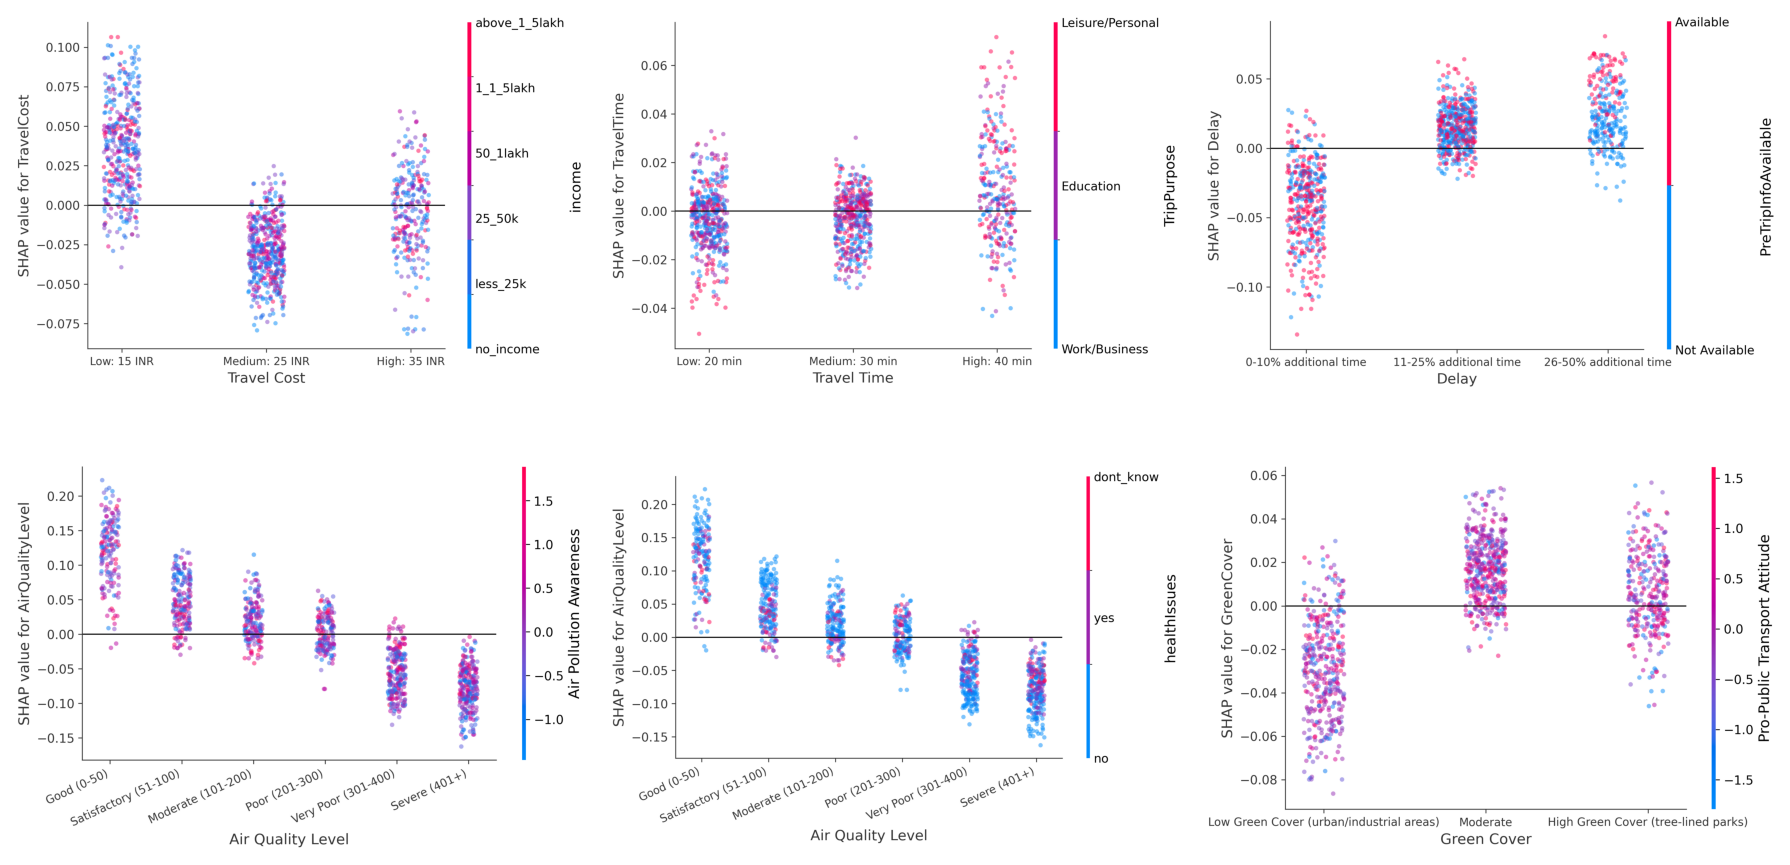

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

files = [
    "fig1.png", "fig2.png", "fig3.png",
    "fig4.png", "fig5.png", "fig6.png"
]

imgs = [Image.open(f) for f in files]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, img in zip(axes, imgs):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.savefig("shap_interactions_grid.png", dpi=300)
plt.show()

#### With Feature Engineering

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values_full = explainer.shap_values(X_test)
shap_values_class1 = shap_values_full[:, :, 1]
shap.summary_plot(shap_values_class1, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values_class1, X_test)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5],
}

rs = RandomizedSearchCV(
    rf,
    param_distributions = param_dist,
    n_iter = 4,
    scoring = 'accuracy',
    cv = 5,
    verbose = 1,
    random_state = 42,
    n_jobs = -1
)

rs.fit(X_train, y_train)
print(rs.best_params_)
print(rs.best_score_)

## Deep Learning Models

### TasteNet-MNL + Attention

In [ ]:
# ============================================================
# TasteNet + Attention with Train/Val/Test Split (PyTorch)
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -------------------------
# 0) Settings — adjust
# -------------------------
taste_cols = [
    # Core socio-demographics
    "age", "income", "education", "gender_male",
    "distance", "frequency",

    # Occupation (one-hot)
    "occupation_homemaker", "occupation_other", "occupation_retired",
    "occupation_self_employed", "occupation_student",
    "occupation_unemployed",

    # Travel mode base
    "travelMode_bus", "travelMode_car", "travelMode_metro",
    "travelMode_two_wheeler",

    # Trip purpose
    "purpose_work", "purpose_leisure", "purpose_other",

    # AQI awareness, exposure, frequency
    "aqiExposure", "aqiAwareness", "aqiFrequency",

    # AQI actions
    "aqiActions_change_mode", "aqiActions_change_route",
    "aqiActions_change_time", "aqiActions_no_action",

    # AQI information sources
    "aqiInfoSource_not_check", "aqiInfoSource_public_monitors",
    "aqiInfoSource_television", "aqiInfoSource_website_app",

    # Attitudinal constructs
    "Pro-Public Transport Attitude",
    "Tech-Enabled Eco-Travel",
    "Air Pollution Awareness",

    # Health-related
    "healthIssues", "healthEffectsAwareness",
    "symptom_skin_problem", "symptom_sneezing",
    "symptom_none", "symptom_runny_nose",
    "symptom_eye_irritation"
]

alt_cols = [
    "AirQualityLevel",
    "TravelTime",
    "TravelCost",
    "Delay",
    "GreenCover",
    "PreTripInfoAvailable"
]

chosen_col = "chosen"
uid_col = "uid"
card_col = "card"

k_latent = 16
alt_emb_dim = 64
taste_hidden = 64
utility_hidden = 64

batch_size = 128
lr = 1e-3
epochs = 80
val_split = 0.15
test_split = 0.15

# -------------------------
# 1) Build choice_id and validate
# -------------------------
long_df = long_df.copy()
long_df["choice_id"] = long_df[uid_col].astype(str) + "_" + long_df[card_col].astype(str)

counts = long_df.groupby("choice_id").size()
bad = counts[counts != counts.iloc[0]]
if len(bad) > 0:
    raise ValueError("Choice sets are not balanced!")

n_alts = counts.iloc[0]
print(f"Detected {len(counts)} choice sets, with {n_alts} alternatives each.")

# -------------------------
# 2) Scaling
# -------------------------
scaler_alt = StandardScaler()
scaler_taste = StandardScaler()

long_df[alt_cols] = scaler_alt.fit_transform(long_df[alt_cols])
long_df[taste_cols] = scaler_taste.fit_transform(long_df[taste_cols])

# -------------------------
# 3) Build choice-level arrays
# -------------------------
choice_ids = long_df["choice_id"].unique()
n_sets = len(choice_ids)
alt_dim = len(alt_cols)
taste_dim = len(taste_cols)

X_alt_sets = np.zeros((n_sets, n_alts, alt_dim), dtype=np.float32)
X_taste_sets = np.zeros((n_sets, taste_dim), dtype=np.float32)
y_sets = np.zeros(n_sets, dtype=np.int64)

for i, cid in enumerate(choice_ids):
    dfc = long_df[long_df["choice_id"] == cid].reset_index(drop=True)
    X_alt_sets[i] = dfc[alt_cols].values
    X_taste_sets[i] = dfc[taste_cols].iloc[0].values
    y_sets[i] = dfc[chosen_col].values.argmax()

print("Shapes:", X_alt_sets.shape, X_taste_sets.shape, y_sets.shape)

# -------------------------
# 4) Dataset class
# -------------------------
class ChoiceDataset(Dataset):
    def __init__(self, Xt, Xa, y):
        self.Xt = torch.tensor(Xt, dtype=torch.float32)
        self.Xa = torch.tensor(Xa, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return self.Xt[i], self.Xa[i], self.y[i]

dataset = ChoiceDataset(X_taste_sets, X_alt_sets, y_sets)

# -------------------------
# 5) Train/Validation/Test Split (by choice set)
# -------------------------
n_total = len(dataset)
n_test = int(test_split * n_total)
n_val = int(val_split * n_total)
n_train = n_total - n_test - n_val

train_ds, val_ds, test_ds = random_split(dataset, [n_train, n_val, n_test])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

print(f"Train sets: {len(train_ds)} | Val sets: {len(val_ds)} | Test sets: {len(test_ds)}")

# -------------------------
# 6) TasteNet + Attention Model
# -------------------------
class TasteNetAttention(nn.Module):
    def __init__(self, alt_dim, taste_dim, k_latent=32, alt_emb_dim=64, utility_hidden=64):
        super().__init__()

        self.taste_net = nn.Sequential(
            nn.Linear(taste_dim, taste_hidden),
            nn.ReLU(),
            nn.BatchNorm1d(taste_hidden),
            nn.Linear(taste_hidden, k_latent)
        )

        self.alt_net = nn.Sequential(
            nn.Linear(alt_dim, alt_emb_dim),
            nn.ReLU(),
            nn.BatchNorm1d(alt_emb_dim),
            nn.Linear(alt_emb_dim, k_latent),
            nn.ReLU()
        )

        self.final_mlp = nn.Sequential(
            nn.Linear(k_latent, utility_hidden),
            nn.ReLU(),
            nn.Linear(utility_hidden, 1)
        )

    def forward(self, taste, alt):
        B, n_alts, _ = alt.shape

        beta = self.taste_net(taste)

        flat = alt.view(B*n_alts, -1)
        alt_repr = self.alt_net(flat).view(B, n_alts, -1)

        scale = np.sqrt(alt_repr.size(-1))
        attn_logits = (alt_repr * beta.unsqueeze(1)).sum(-1) / scale
        attn = torch.softmax(attn_logits, dim=-1)

        combined = alt_repr * beta.unsqueeze(1)
        utilities = self.final_mlp(combined.view(B*n_alts, -1)).view(B, n_alts)

        return utilities

# -------------------------
# 7) Training utilities
# -------------------------
model = TasteNetAttention(alt_dim, taste_dim, k_latent, alt_emb_dim, utility_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(model.parameters(), lr=lr, weight_decay=1e-5)

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for Xt, Xa, y in loader:
            Xt, Xa, y = Xt.to(device), Xa.to(device), y.to(device)
            logits = model(Xt, Xa)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total

# -------------------------
# 8) Training loop with val accuracy
# -------------------------
best_val = 0
best_state = None

for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0

    for Xt, Xa, y in train_loader:
        Xt, Xa, y = Xt.to(device), Xa.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(Xt, Xa)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * y.size(0)

    train_loss = running_loss / len(train_ds)
    train_acc = evaluate(model, train_loader)
    val_acc = evaluate(model, val_loader)

    print(f"Epoch {epoch:03d} | Loss={train_loss:.4f} | TrainAcc={train_acc:.4f} | ValAcc={val_acc:.4f}")

    if val_acc > best_val:
        best_val = val_acc
        best_state = model.state_dict()

# -------------------------
# 9) Final test evaluation
# -------------------------
model.load_state_dict(best_state)
test_acc = evaluate(model, test_loader)
print("Best Validation Accuracy:", best_val)
print("Final Test Accuracy:", test_acc)

Device: cuda
Detected 2892 choice sets, with 2 alternatives each.
Shapes: (2892, 2, 6) (2892, 40) (2892,)
Train sets: 2026 | Val sets: 433 | Test sets: 433
Epoch 001 | Loss=0.6906 | TrainAcc=0.6091 | ValAcc=0.5635
Epoch 002 | Loss=0.6683 | TrainAcc=0.6782 | ValAcc=0.6166
Epoch 003 | Loss=0.6156 | TrainAcc=0.7246 | ValAcc=0.6467
Epoch 004 | Loss=0.5495 | TrainAcc=0.7586 | ValAcc=0.6651
Epoch 005 | Loss=0.4929 | TrainAcc=0.8016 | ValAcc=0.6721
Epoch 006 | Loss=0.4418 | TrainAcc=0.8406 | ValAcc=0.6952
Epoch 007 | Loss=0.3925 | TrainAcc=0.8643 | ValAcc=0.7021
Epoch 008 | Loss=0.3481 | TrainAcc=0.8830 | ValAcc=0.6998
Epoch 009 | Loss=0.3081 | TrainAcc=0.9003 | ValAcc=0.7136
Epoch 010 | Loss=0.2753 | TrainAcc=0.9166 | ValAcc=0.7229
Epoch 011 | Loss=0.2415 | TrainAcc=0.9329 | ValAcc=0.7159
Epoch 012 | Loss=0.2142 | TrainAcc=0.9492 | ValAcc=0.7229
Epoch 013 | Loss=0.1872 | TrainAcc=0.9630 | ValAcc=0.7460
Epoch 014 | Loss=0.1634 | TrainAcc=0.9684 | ValAcc=0.7460
Epoch 015 | Loss=0.1410 | TrainA

In [ ]:
def get_predictions(model, loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for Xt, Xa, y in loader:
            Xt, Xa = Xt.to(device), Xa.to(device)
            logits = model(Xt, Xa)
            preds = logits.argmax(dim=1)

            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    return np.array(y_true), np.array(y_pred)

In [ ]:
y_true, y_pred = get_predictions(model, test_loader)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
acc = accuracy_score(y_true, y_pred)
pr = precision_score(y_true, y_pred)
rc = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print("Accuracy:", acc)
print("Precision:", pr)
print("Recall:", rc)
print("F1:", f1)

Accuracy: 0.8106235565819861
Precision: 0.7666666666666667
Recall: 0.7752808988764045
F1: 0.770949720670391


### Normal ANN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# normal ANN
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_ds = SimpleDataset(X_train_scaled, y_train)
test_ds  = SimpleDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False)

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim, hidden=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 2)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
input_dim = X_train_scaled.shape[1]
model = ANN(input_dim=input_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            yb = yb.to(device)
            logits = model(Xb)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += len(yb)
    return correct / total

In [ ]:
epochs = 80
for ep in range(1, epochs+1):
    model.train()
    running_loss = 0

    for Xb, yb in train_loader:
        optimizer.zero_grad()
        Xb = Xb.to(device)
        yb = yb.to(device)
        logits = model(Xb).to(device)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * len(yb)

    train_acc = evaluate(model, train_loader)
    test_acc  = evaluate(model, test_loader)

    print(f"Epoch {ep:03d} | Loss={running_loss/len(train_ds):.4f} "
          f"| TrainAcc={train_acc:.4f} | TestAcc={test_acc:.4f}")

Epoch 001 | Loss=0.6818 | TrainAcc=0.6209 | TestAcc=0.6162
Epoch 002 | Loss=0.6503 | TrainAcc=0.6339 | TestAcc=0.6335
Epoch 003 | Loss=0.6280 | TrainAcc=0.6544 | TestAcc=0.6456
Epoch 004 | Loss=0.6064 | TrainAcc=0.6892 | TestAcc=0.6439
Epoch 005 | Loss=0.5826 | TrainAcc=0.7210 | TestAcc=0.6569
Epoch 006 | Loss=0.5540 | TrainAcc=0.7489 | TestAcc=0.6491
Epoch 007 | Loss=0.5275 | TrainAcc=0.7703 | TestAcc=0.6577
Epoch 008 | Loss=0.5034 | TrainAcc=0.7927 | TestAcc=0.6707
Epoch 009 | Loss=0.4829 | TrainAcc=0.8089 | TestAcc=0.6828
Epoch 010 | Loss=0.4523 | TrainAcc=0.8182 | TestAcc=0.6716
Epoch 011 | Loss=0.4314 | TrainAcc=0.8409 | TestAcc=0.6629
Epoch 012 | Loss=0.4099 | TrainAcc=0.8440 | TestAcc=0.6785
Epoch 013 | Loss=0.3777 | TrainAcc=0.8759 | TestAcc=0.6940
Epoch 014 | Loss=0.3563 | TrainAcc=0.8822 | TestAcc=0.6854
Epoch 015 | Loss=0.3423 | TrainAcc=0.8935 | TestAcc=0.6949
Epoch 016 | Loss=0.3151 | TrainAcc=0.9120 | TestAcc=0.7156
Epoch 017 | Loss=0.2915 | TrainAcc=0.9207 | TestAcc=0.72

In [ ]:
import numpy as np

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)
        logits = model(Xb)
        preds = logits.argmax(dim=1)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       595
           1       0.77      0.75      0.76       562

    accuracy                           0.77      1157
   macro avg       0.77      0.77      0.77      1157
weighted avg       0.77      0.77      0.77      1157



In [ ]:
print(f"Accuracy = {accuracy_score(y_true, y_pred)}")
print(f"Precision = {precision_score(y_true, y_pred)}")
print(f"Recall = {recall_score(y_true, y_pred)}")
print(f"F1 = {f1_score(y_true, y_pred)}")

Accuracy = 0.7709593777009507
Precision = 0.7714808043875686
Recall = 0.7508896797153025
F1 = 0.7610459873760145


### CNN + MLP

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# CNN + MLP
class CNN_Dataset(Dataset):
    def __init__(self, X, y):
        X = X.astype(np.float32)
        self.X = torch.tensor(X).unsqueeze(1)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_ds = CNN_Dataset(X_train_scaled, y_train)
test_ds  = CNN_Dataset(X_test_scaled, y_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False)

In [ ]:
class CNN_MLP(nn.Module):
    def __init__(self, input_len, num_classes=2):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )

        flatten_dim = (input_len // 2) * 32

        self.mlp = nn.Sequential(
            nn.Linear(flatten_dim, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        z = self.cnn(x)
        z = z.view(z.size(0), -1)
        out = self.mlp(z)
        return out

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_len = X_train_scaled.shape[1]
model = CNN_MLP(input_len=input_len).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in loader:
            Xb, yb = Xb.to(device), yb.to(device)
            logits = model(Xb)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += len(yb)
    return correct / total

In [ ]:
epochs = 80
for ep in range(1, epochs+1):
    model.train()
    running_loss = 0

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*len(yb)

    train_acc = evaluate(model, train_loader)
    test_acc  = evaluate(model, test_loader)

    print(f"Epoch {ep:03d} | Loss={running_loss/len(train_ds):.4f} "
          f"| TrainAcc={train_acc:.4f} | TestAcc={test_acc:.4f}")

Epoch 001 | Loss=0.6923 | TrainAcc=0.5917 | TestAcc=0.5895
Epoch 002 | Loss=0.6730 | TrainAcc=0.6023 | TestAcc=0.5938
Epoch 003 | Loss=0.6523 | TrainAcc=0.6458 | TestAcc=0.6223
Epoch 004 | Loss=0.6330 | TrainAcc=0.6551 | TestAcc=0.6292
Epoch 005 | Loss=0.6158 | TrainAcc=0.6652 | TestAcc=0.6327
Epoch 006 | Loss=0.5978 | TrainAcc=0.6745 | TestAcc=0.6318
Epoch 007 | Loss=0.5828 | TrainAcc=0.6657 | TestAcc=0.6258
Epoch 008 | Loss=0.5727 | TrainAcc=0.7026 | TestAcc=0.6396
Epoch 009 | Loss=0.5571 | TrainAcc=0.7247 | TestAcc=0.6430
Epoch 010 | Loss=0.5482 | TrainAcc=0.7387 | TestAcc=0.6404
Epoch 011 | Loss=0.5242 | TrainAcc=0.7510 | TestAcc=0.6482
Epoch 012 | Loss=0.5103 | TrainAcc=0.7620 | TestAcc=0.6517
Epoch 013 | Loss=0.4950 | TrainAcc=0.7817 | TestAcc=0.6500
Epoch 014 | Loss=0.4759 | TrainAcc=0.7893 | TestAcc=0.6612
Epoch 015 | Loss=0.4550 | TrainAcc=0.8085 | TestAcc=0.6664
Epoch 016 | Loss=0.4450 | TrainAcc=0.8163 | TestAcc=0.6724
Epoch 017 | Loss=0.4186 | TrainAcc=0.8446 | TestAcc=0.68

In [ ]:
from sklearn.metrics import classification_report

y_true, y_pred = [], []
model.eval()

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)

        logits = model(Xb)
        preds = logits.argmax(dim=1)

        y_true.extend(yb.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       595
           1       0.80      0.74      0.77       562

    accuracy                           0.79      1157
   macro avg       0.79      0.79      0.79      1157
weighted avg       0.79      0.79      0.79      1157



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
print(f"Accuracy = {accuracy_score(y_true, y_pred)}")
print(f"Precision = {precision_score(y_true, y_pred)}")
print(f"Recall = {recall_score(y_true, y_pred)}")
print(f"F1 = {f1_score(y_true, y_pred)}")

Accuracy = 0.7865168539325843
Precision = 0.8034682080924855
Recall = 0.7419928825622776
F1 = 0.7715078630897317


### 1D ResNet

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# 1D ResNet
class ResNetBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)

        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = out + self.shortcut(x)
        return nn.ReLU()(out)

In [ ]:
class ResNet1D(nn.Module):
    def __init__(self, input_len, num_classes=2, channels=[64,128,256,512]):
        super().__init__()

        self.in_channels = 64
        self.conv1 = nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(channels[0], stride=1)
        self.layer2 = self._make_layer(channels[1], stride=2)
        self.layer3 = self._make_layer(channels[2], stride=2)
        self.layer4 = self._make_layer(channels[3], stride=2)
        dummy = torch.zeros(1,1,input_len)

        with torch.no_grad():
            out = self._forward_features(dummy)
            flat_dim = out.shape[1] * out.shape[2]

        self.fc = nn.Linear(flat_dim, num_classes)

    def _make_layer(self, out_channels, stride):
        layer = ResNetBlock1D(self.in_channels, out_channels, stride)
        self.in_channels = out_channels
        return nn.Sequential(layer)

    def _forward_features(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

In [ ]:
class ResNet1D_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = ResNet1D_Dataset(X_train_scaled, y_train)
test_ds  = ResNet1D_Dataset(X_test_scaled, y_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet1D(input_len=X_train_scaled.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for Xb, yb in loader:
            Xb, yb = Xb.to(device), yb.to(device)
            logits = model(Xb)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += len(yb)
    return correct / total


epochs = 80
for ep in range(1, epochs+1):
    model.train()
    running_loss = 0

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*len(yb)

    train_acc = evaluate(model, train_loader)
    test_acc  = evaluate(model, test_loader)

    print(f"Epoch {ep:03d} | Loss={running_loss/len(train_ds):.4f} "
          f"| TrainAcc={train_acc:.4f} | TestAcc={test_acc:.4f}")

Epoch 001 | Loss=0.7876 | TrainAcc=0.6590 | TestAcc=0.6111
Epoch 002 | Loss=0.5973 | TrainAcc=0.7765 | TestAcc=0.6759
Epoch 003 | Loss=0.5120 | TrainAcc=0.8206 | TestAcc=0.6811
Epoch 004 | Loss=0.4484 | TrainAcc=0.8364 | TestAcc=0.7105
Epoch 005 | Loss=0.3931 | TrainAcc=0.8327 | TestAcc=0.7010
Epoch 006 | Loss=0.3171 | TrainAcc=0.9049 | TestAcc=0.7390
Epoch 007 | Loss=0.2677 | TrainAcc=0.9369 | TestAcc=0.7571
Epoch 008 | Loss=0.2106 | TrainAcc=0.9356 | TestAcc=0.7528
Epoch 009 | Loss=0.2177 | TrainAcc=0.9574 | TestAcc=0.7744
Epoch 010 | Loss=0.1390 | TrainAcc=0.9760 | TestAcc=0.7891
Epoch 011 | Loss=0.1068 | TrainAcc=0.9708 | TestAcc=0.7779
Epoch 012 | Loss=0.1084 | TrainAcc=0.9678 | TestAcc=0.7943
Epoch 013 | Loss=0.1318 | TrainAcc=0.9767 | TestAcc=0.7822
Epoch 014 | Loss=0.0973 | TrainAcc=0.9855 | TestAcc=0.8021
Epoch 015 | Loss=0.0443 | TrainAcc=0.9944 | TestAcc=0.8194
Epoch 016 | Loss=0.0680 | TrainAcc=0.9896 | TestAcc=0.8124
Epoch 017 | Loss=0.1426 | TrainAcc=0.9754 | TestAcc=0.80

In [ ]:
from sklearn.metrics import classification_report

y_true, y_pred = [], []
model.eval()

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)

        logits = model(Xb)
        preds = logits.argmax(dim=1)

        y_true.extend(yb.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       595
           1       0.85      0.85      0.85       562

    accuracy                           0.85      1157
   macro avg       0.85      0.85      0.85      1157
weighted avg       0.85      0.85      0.85      1157



In [ ]:
print(f"Accuracy = {accuracy_score(y_true, y_pred)}")
print(f"Precision = {precision_score(y_true, y_pred)}")
print(f"Recall = {recall_score(y_true, y_pred)}")
print(f"F1 = {f1_score(y_true, y_pred)}")

Accuracy = 0.8522039757994814
Precision = 0.8497316636851521
Recall = 0.8451957295373665
F1 = 0.847457627118644


### Feature Importance

In [ ]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 131.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 w

In [ ]:
from captum.attr import IntegratedGradients
import torch
import numpy as np

In [ ]:
class ProbWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        logits = self.model(x)
        probs = torch.softmax(logits, dim=1)
        return probs[:, 1]

##### 1D ResNet

In [ ]:
from captum.attr import IntegratedGradients
import torch
import numpy as np

In [ ]:
class ProbWrapper(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        logits = self.model(x)
        probs = torch.softmax(logits, dim=1)
        return probs[:, 1]

In [ ]:
model.eval()

baseline = torch.tensor(
    X_train_scaled.mean(axis=0),
    dtype=torch.float32
).unsqueeze(0).unsqueeze(0).to(device)

X_explain = torch.tensor(
    X_test_scaled,
    dtype=torch.float32
).unsqueeze(1).to(device)

wrapped_model = ProbWrapper(model).to(device)
ig = IntegratedGradients(wrapped_model)

attributions, delta = ig.attribute(
    inputs=X_explain,
    baselines=baseline,
    n_steps=50,
    return_convergence_delta=True
)
ig_np = attributions.squeeze(1).detach().cpu().numpy()

In [ ]:
print("Mean convergence delta:", delta.abs().mean().item())

Mean convergence delta: 0.02010221779346466


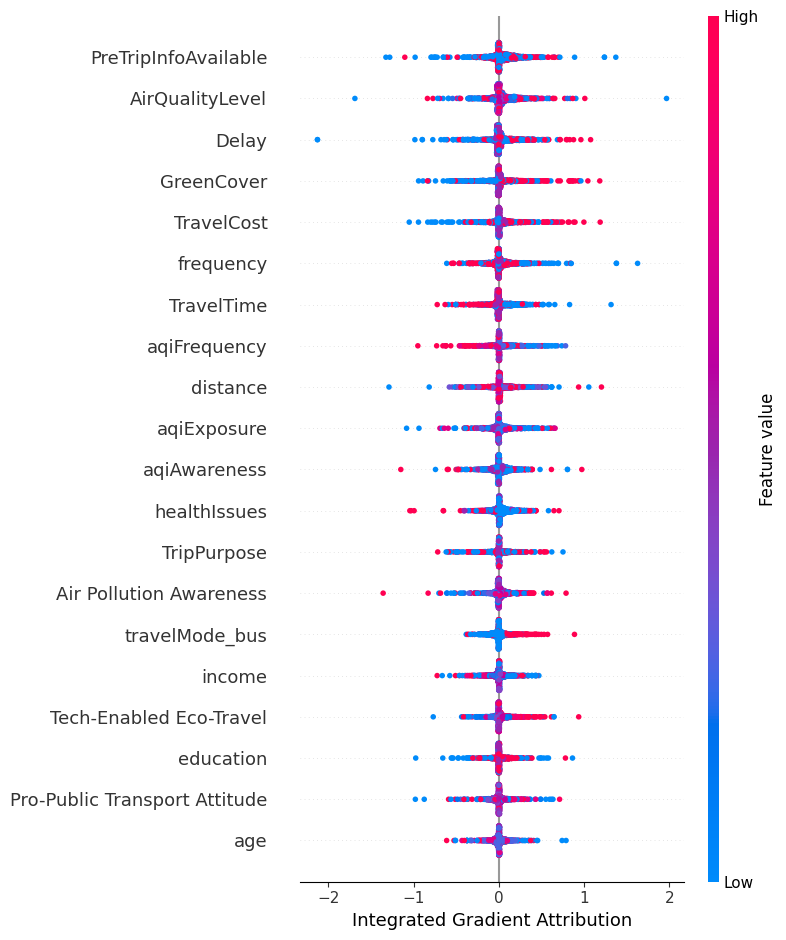

In [ ]:
import shap
import matplotlib.pyplot as plt

X_np = X_explain.squeeze(1).cpu().numpy()

shap.summary_plot(
    ig_np,
    X_np,
    feature_names=X_train.columns.tolist(),
    show=False
)
plt.xlabel("Integrated Gradient Attribution")
plt.tight_layout()
plt.show()

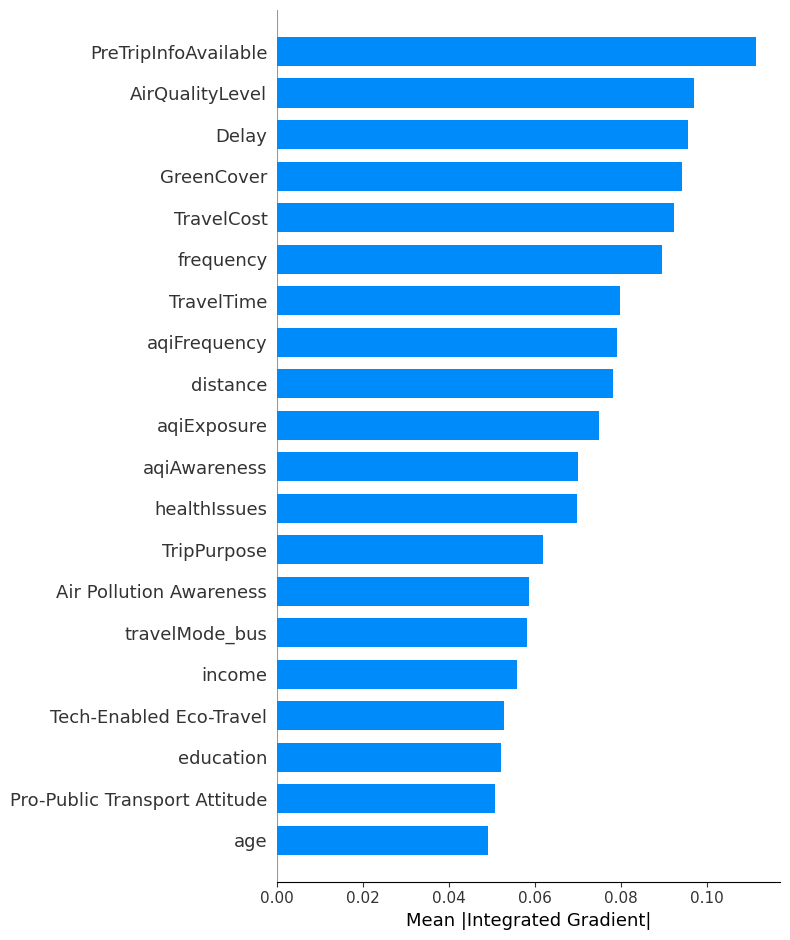

In [ ]:
shap.summary_plot(
    ig_np,
    X_np,
    feature_names=X_train.columns.tolist(),
    plot_type="bar",
    show=False
)
plt.xlabel("Mean |Integrated Gradient|")
plt.tight_layout()
plt.show()

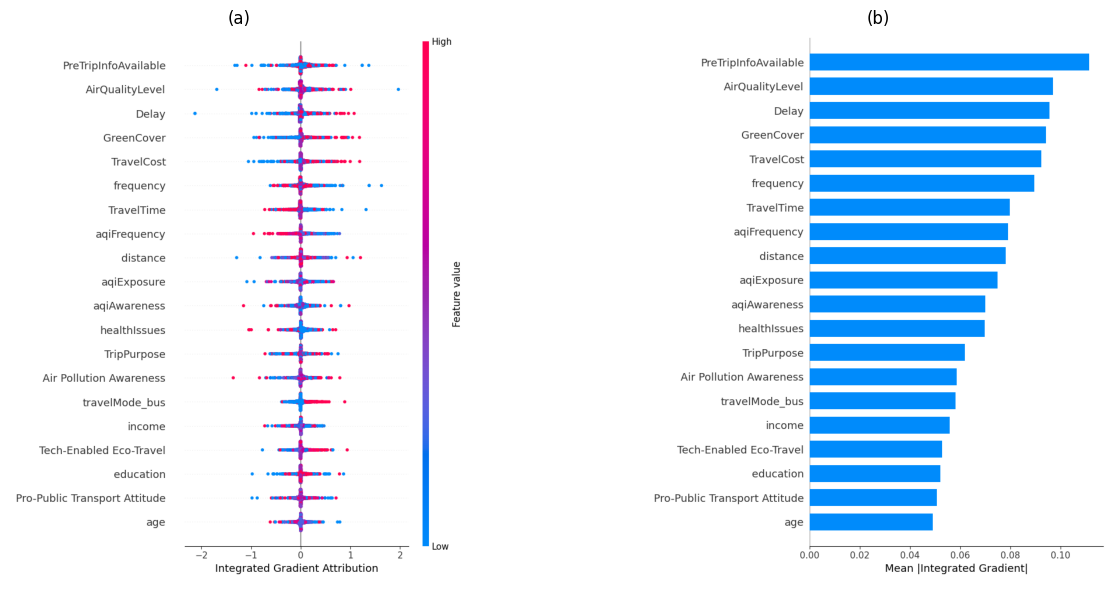

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img_beeswarm = Image.open("resnet_ig.png")
img_bar = Image.open("resnet_ig_bar.png")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(img_beeswarm)
axes[0].axis("off")
axes[0].set_title("(a)", fontsize=12)

axes[1].imshow(img_bar)
axes[1].axis("off")
axes[1].set_title("(b)", fontsize=12)

plt.tight_layout()
plt.savefig("resnet_ig_combined.png", dpi=300, bbox_inches="tight")
plt.show()